In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [105]:
nlp = spacy.load("en")

In [2]:
path = '/Users/motoku/Downloads/OnlineNews-150Snippet.csv'

In [3]:
CovidReleases = pandas.read_csv(path, index_col=0)

In [7]:
CovidReleases # Basic settings are Date , Title, and Context

Title  \
Date                                                                
20160804160000  Is the Concern About Zika Virus and the Olympi...   
20150728000000  Two Suspected Cases of MERS in Northern Englan...   
20200213120000  Coronavirus: Coronavirus support centre is ope...   
20200213120000  Cruise ship turned away in other ports docks i...   
20200213120000  Kazakhstanis locked on a Japanese cruise ship ...   
...                                                           ...   
20200214101500              Philippines to lift Taiwan travel ban   
20200214101500  MORNING BID EUROPE-Virus victim count rises --...   
20200214101500  GLOBAL LNG-Asian LNG prices fall to $2.70/mmBt...   
20200214101500  European shares open at record high; Q4 GDP da...   
20200214101500  CORRECTED-GLOBAL MARKETS-Asian shares aim for ...   

                                                     SharingImage  \
Date                                                                
20160804160000  http://i.huffpost.com/gen/4566378/images/o-ZIK...   
20150728000000  http://images.youthhealthmag.com/data/images/f...   
20200213120000  https://www.chesterstandard.co.uk/resources/im...   
20200213120000  https://images.glaciermedia.ca/polopoly_fs/1.2...   
20200213120000  https://www.kazpravda.kz/uploads/publication2/...   
...                                                           ...   
20200214101500  https://s4.reutersmedia.net/resources_v2/image...   
20200214101500  https://s4.reutersmedia.net/resources_v2/image...   
20200214101500  https://s4.reutersmedia.net/resources_v2/image...   
20200214101500  https://s4.reutersmedia.net/resources_v2/image...   
20200214101500  https://s4.reutersmedia.net/resources_v2/image...   

                                                              URL  \
Date                                                                
20160804160000  http://www.huffingtonpost.co.uk/dr-edward-wrig...   
20150728000000  http://www.youthhealthmag.com/articles/20059/2...   
20200213120000  https://www.chesterstandard.co.uk/news/1823244...   
20200213120000  https://www.prpeak.com/cruise-ship-turned-away...   
20200213120000  https://www.kazpravda.kz/en/news/society/kazak...   
...                                                           ...   
20200214101500  https://www.reuters.com/article/us-china-healt...   
20200214101500  https://www.reuters.com/article/morning-bid-eu...   
20200214101500  https://www.reuters.com/article/global-lng/glo...   
20200214101500  https://www.reuters.com/article/europe-stocks/...   
20200214101500  https://www.reuters.com/article/global-markets...   

                                                          Context  
Date                                                               
20160804160000   illness began to surface in Saudi Arabia. The...  
20150728000000   by travelers to at least 25 countries worldwi...  
20200213120000  A Coronavirus support centre has been set up a...  
20200213120000  the health of its 2,200 passengers and crew. T...  
20200213120000   reports. "3,700 citizens from 50 countries we...  
...                                                           ...  
20200214101500  MANILA/TAIPEI (Reuters) - The Philippines will...  
20200214101500  ahead from EMEA deputy markets editor Sujata R...  
20200214101500  2.70 per million British thermal units (mmBtu)...  
20200214101500  ) Feb 14 (Reuters) - European shares inched up...  
20200214101500  most of virus-caused losses * Dollar hits 4-mo...  

[1191652 rows x 4 columns]

In [70]:
CovidReleases1 =CovidReleases.reset_index()

In [84]:
#CovidReleases1.loc[(CovidReleases1["Date"] >= 20200218000000)& (CovidReleases1["Date"] <= 20200313000000)]


Date                                              Title  \
175      20200224000000  Saharan sandstorm leaves British holidaymakers...   
176      20200224000000  Russia suspected of blaming United States for ...   
177      20200224000000  Mum-of-eight wins fight to keep sanctuary for ...   
178      20200224000000  Morning Briefing: Top stories from The Straits...   
179      20200224000000                         Gold: Building A Bull Trap   
...                 ...                                                ...   
1191633  20200228181500  Russians to skip World Cup events in U.S., Jap...   
1191638  20200311221500  Panama orders short-term closure of all school...   
1191639  20200311221500  UPDATE 1-Brazil's Itau Unibanco says two emplo...   
1191640  20200311221500  GLOBAL MARKETS-Dow enters bear market territor...   
1191641  20200311221500  San Francisco Fed asks all staff to work from ...   

                                              SharingImage  \
175      https://www.readingchronicle.co.uk/resources/i...   
176      https://cdn.bignewsnetwork.com/cus158248538753...   
177      https://www.thesun.co.uk/wp-content/uploads/20...   
178      https://www.straitstimes.com/sites/all/themes/...   
179      https://static3.seekingalpha.com/assets/og_ima...   
...                                                    ...   
1191633  https://s4.reutersmedia.net/resources_v2/image...   
1191638  https://s4.reutersmedia.net/resources_v2/image...   
1191639  https://s4.reutersmedia.net/resources_v2/image...   
1191640  https://s4.reutersmedia.net/resources_v2/image...   
1191641  https://s4.reutersmedia.net/resources_v2/image...   

                                                       URL  \
175      https://www.readingchronicle.co.uk/news/nation...   
176      https://www.taiwansun.com/news/264108197/russi...   
177      https://www.thesun.co.uk/news/11026392/mum-kee...   
178      https://www.straitstimes.com/singapore/morning...   
179      https://seekingalpha.com/article/4326529-gold-...   
...                                                    ...   
1191633  https://www.reuters.com/article/us-china-healt...   
1191638  https://in.reuters.com/article/us-health-coron...   
1191639  https://www.reuters.com/article/health-coronav...   
1191640  https://af.reuters.com/article/metalsNews/idAF...   
1191641  https://in.reuters.com/article/us-health-coron...   

                                                   Context  
175      Tim Crew, 69, had booked a holiday to Lanzarot...  
176      U.S. government officials have suspected Russi...  
177       exclusive FREE TO ROAMBritain's worst female ...  
178       event in Putrajaya on Feb 18, 2020. PHOTO: EP...  
179      We use the Variable Changing Price Momentum In...  
...                                                    ...  
1191633   said on Instagram that he and the Russian tea...  
1191638  PANAMA CITY (Reuters) - Panama's government or...  
1191639   11 (Reuters) - Brazil's largest private-lende...  
1191640   and market activity to U.S. close) * U.S. sto...  
1191641  SAN FRANCISCO (Reuters) - The Federal Reserve ...  

[803720 rows x 5 columns]

In [86]:
Covid_after_march = CovidReleases1.loc[(CovidReleases1["Date"] >= 20200301000000)] # data after March

In [267]:
Covid_before_march = CovidReleases1.loc[(CovidReleases1["Date"] <= 20200301000000)] # data before March, for later comparison

In [268]:
len(Covid_before_march)

622324

In [89]:
Covid_after_march['Title']

467        China's skies are briefly clearer while factor...
468        Netanyahu ahead in Israeli election, but still...
469        Kim watches N Korea military drill alongside m...
470                  Does hand sanitiser work against virus?
471        Exit Polls: Netanyahu Short Of Majority In Isr...
                                 ...                        
1191625    Czech Republic closing schools, banning events...
1191638    Panama orders short-term closure of all school...
1191639    UPDATE 1-Brazil's Itau Unibanco says two emplo...
1191640    GLOBAL MARKETS-Dow enters bear market territor...
1191641    San Francisco Fed asks all staff to work from ...
Name: Title, Length: 569580, dtype: object

In [90]:
Covid_after_march2 =Covid_after_march.reset_index()


In [269]:
Covid_before_march2 =Covid_before_march.reset_index()


In [270]:
Covid_before_march_RD = Covid_before_march2.sample(n=3000,random_state=1,axis=0) # we take 3000 sample out of this dataset


In [271]:
Covid_before_march_RD =Covid_before_march_RD.reset_index() # again, I'm doing reindex here

In [272]:
Covid_before_march_RD

level_0    index            Date  \
0      608354  1167104  20200125143000   
1      414295   793322  20200214171500   
2      403378   772675  20200216220000   
3      564273  1087944  20200228094500   
4      572239  1101812  20200125074500   
...       ...      ...             ...   
2995   148887   286699  20200225103000   
2996    25132    48367  20200124223000   
2997   211225   411614  20200219041500   
2998   557987  1076648  20200225173000   
2999   193083   375849  20200129133000   

                                                  Title  \
0     WYWS: Anxious start to Chinese New Year festiv...   
1     China's economy is expected to slow to worst p...   
2     'Parasite' director Bong greeted by applause i...   
3     Pence's public health record raises concern as...   
4     Confirmed cases of new coronavirus pneumonia r...   
...                                                 ...   
2995  Coronavirus containment window shrinking as vi...   
2996  Staten Island hospitals on high alert for dead...   
2997  MKR Rivals: My Kitchen Rules removed from Sund...   
2998  ADB to grant 130-mln-yuan loan to China's phar...   
2999  Deaths rise to 132 in China outbreak as foreig...   

                                           SharingImage  \
0                                                   NaN   
1     https://static4.businessinsider.com/image/5e46...   
2     https://bloximages.chicago2.vip.townnews.com/d...   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2995  https://www.cp24.com/polopoly_fs/1.4783892.158...   
2996  https://www.silive.com/resizer/6oI9aTfn3NASene...   
2997  https://cdn.newsapi.com.au/image/v1/8b48589ccc...   
2998                                                NaN   
2999  https://myrepublica.nagariknetwork.com/uploads...   

                                                    URL  \
0     https://www.msn.com/en-ca/news/canada/wyws-anx...   
1     https://mrtopstep.com/chinas-economy-is-expect...   
2     https://dailyjournalonline.com/entertainment/m...   
3     https://www.790wpic.com/news/pences-public-hea...   
4     http://english.sina.com/news/2020-01-25/detail...   
...                                                 ...   
2995  https://www.cp24.com/news/coronavirus-containm...   
2996  https://www.silive.com/news/2020/01/staten-isl...   
2997  https://www.ntnews.com.au/news/big-blow-for-my...   
2998  http://www.newstoday.com.bd/index.php?option=d...   
2999  https://myrepublica.nagariknetwork.com/news/de...   

                                                Context  
0     , started its Lunar New Year festivities in su...  
1     China coronavirus disinfectant A deadly viral ...  
2     virus that has sickened tens of thousands, mos...  
3      single point drop in history Thursday), there...  
4     HONG KONG, Jan. 25 (Xinhua) -- Hong Kong has r...  
...                                                 ...  
2995  OTTAWA - Canada's border measures to guard the...  
2996  STATEN ISLAND, N.Y. – Staten Island hospital p...  
2997  like Koala Rescue and Fire Fight Australia wer...  
2998   Tuesday that it will grant a loan of 130 mill...  
2999   woman developed nausea at the airport and was...  

[3000 rows x 7 columns]

# let's start with covid after march, where  the risk assessment of COVID-19 was increased to ‘very high’ at the global level
Since 803720 might be a really huge number, I decide to reduce to 3000 at first (although it's also big enough)

In [92]:
Covid_after_march_RD = Covid_after_march2.sample(n=3000,random_state=1,axis=0) # we take 3000 sample out of this dataset


In [93]:
Covid_after_march_RD =Covid_after_march_RD.reset_index() # again, I'm doing reindex here

In [94]:
Covid_after_march_RD

level_0   index            Date  \
0      460906  959224  20200307160000   
1      241948  498787  20200303144500   
2       44208   92194  20200304190000   
3      168792  348118  20200309123000   
4      279808  583660  20200312064500   
...       ...     ...             ...   
2995    88331  184407  20200311174500   
2996   434450  905817  20200304014500   
2997   357797  748975  20200311164500   
2998   321223  672032  20200309033000   
2999   212363  436173  20200304193000   

                                                  Title  \
0                    3 Things Under the Radar This Week   
1     Top 10 world news today: Coronavirus spreads r...   
2     How America Can Beat COVID-19 by James K. Galb...   
3     Saudi Arabia to fine people hiding health deta...   
4     NBA suspends season until further notice, over...   
...                                                 ...   
2995  Plenty of labs can now test for coronavirus. B...   
2996  AG Nessel warns Michigan shops of illegal coro...   
2997  Montana Morning State News Headlines for Wedne...   
2998  3 European nations ban large-scale events | NH...   
2999   Looking for hand sanitizer? Good luck finding it   

                                           SharingImage  \
0     https://i-invdn-com.akamaized.net/news/LYNXNPE...   
1                                                   NaN   
2     https://webapi.project-syndicate.org/library/0...   
3     https://s2.reutersmedia.net/resources/r/?m=02&...   
4                                                   NaN   
...                                                 ...   
2995  https://www.arkansasnews.com/storyimage/ZZ/202...   
2996  https://radiocms-images.us1.eldarioncloud.com/...   
2997  https://townsquare.media/site/119/files/2020/0...   
2998  https://www3.nhk.or.jp/nhkworld/common/sns_ima...   
2999  https://www.thetimes-tribune.com/polopoly_fs/1...   

                                                    URL  \
0     https://www.investing.com/news/economy/3-thing...   
1     https://www.msn.com/en-in/news/other/top-10-wo...   
2     https://www.project-syndicate.org/commentary/c...   
3     https://www.reuters.com/article/us-health-coro...   
4     https://www.cochranetoday.ca/world-news/nba-su...   
...                                                 ...   
2995  https://www.arkansasnews.com/zz/news/20200311/...   
2996  https://q106fm.com/news/articles/2020/mar/04/a...   
2997  https://kyssfm.com/montana-morning-state-news-...   
2998  https://www3.nhk.or.jp/nhkworld/en/news/202003...   
2999  https://www.thetimes-tribune.com/looking-for-h...   

                                                Context  
0     virus becomes widespread." 3. All About Isolat...  
1     Ashraf Ghani standing in front of a store © Pr...  
2     attacked Pearl Harbor, the United States was s...  
3      view of the Grand Mosque which is almost empt...  
4     MIAMI — The NBA has suspended its season "unti...  
...                                                 ...  
2995  A new shortage of a key testing component is h...  
2996  LANSING, MI (WKZO AM/FM) -- Michigan Attorney ...  
2997  that ended in Missoula on Tuesday night. The U...  
2998  European countries have started to ban large-s...  
2999  :02:28 17:18:41 / FILE - In this Feb. 28, 2020...  

[3000 rows x 7 columns]

In [122]:
print(Covid_after_march_RD['Context'][0])

virus becomes widespread." 3. All About Isolating the Benjamins Jerome Powell and Co. aren't just working on softening the economic impact of Covid-19. It's looking to keep the disease itself from spreading. The Fed is quarantining physical U.S. dollars coming back to the country from Asia. 


In [110]:
Covid_after_march_RD['Context'][2999]

':02:28 17:18:41 / FILE - In this Feb. 28, 2020 file photo, rows of hand sanitizer are seen empty at a Walgreens in Idaho Falls, Idaho. Fear of the coronavirus has led people to stock up on hand sanitizer, leaving store shelves empty and online retailers with sky-high prices set by those trying to profit on '

In [156]:
Covid_after_march_RD

level_0   index            Date  \
0      460906  959224  20200307160000   
1      241948  498787  20200303144500   
2       44208   92194  20200304190000   
3      168792  348118  20200309123000   
4      279808  583660  20200312064500   
...       ...     ...             ...   
2995    88331  184407  20200311174500   
2996   434450  905817  20200304014500   
2997   357797  748975  20200311164500   
2998   321223  672032  20200309033000   
2999   212363  436173  20200304193000   

                                                  Title  \
0                    3 Things Under the Radar This Week   
1     Top 10 world news today: Coronavirus spreads r...   
2     How America Can Beat COVID-19 by James K. Galb...   
3     Saudi Arabia to fine people hiding health deta...   
4     NBA suspends season until further notice, over...   
...                                                 ...   
2995  Plenty of labs can now test for coronavirus. B...   
2996  AG Nessel warns Michigan shops of illegal coro...   
2997  Montana Morning State News Headlines for Wedne...   
2998  3 European nations ban large-scale events | NH...   
2999   Looking for hand sanitizer? Good luck finding it   

                                           SharingImage  \
0     https://i-invdn-com.akamaized.net/news/LYNXNPE...   
1                                                   NaN   
2     https://webapi.project-syndicate.org/library/0...   
3     https://s2.reutersmedia.net/resources/r/?m=02&...   
4                                                   NaN   
...                                                 ...   
2995  https://www.arkansasnews.com/storyimage/ZZ/202...   
2996  https://radiocms-images.us1.eldarioncloud.com/...   
2997  https://townsquare.media/site/119/files/2020/0...   
2998  https://www3.nhk.or.jp/nhkworld/common/sns_ima...   
2999  https://www.thetimes-tribune.com/polopoly_fs/1...   

                                                    URL  \
0     https://www.investing.com/news/economy/3-thing...   
1     https://www.msn.com/en-in/news/other/top-10-wo...   
2     https://www.project-syndicate.org/commentary/c...   
3     https://www.reuters.com/article/us-health-coro...   
4     https://www.cochranetoday.ca/world-news/nba-su...   
...                                                 ...   
2995  https://www.arkansasnews.com/zz/news/20200311/...   
2996  https://q106fm.com/news/articles/2020/mar/04/a...   
2997  https://kyssfm.com/montana-morning-state-news-...   
2998  https://www3.nhk.or.jp/nhkworld/en/news/202003...   
2999  https://www.thetimes-tribune.com/looking-for-h...   

                                                Context  \
0     virus becomes widespread." 3. All About Isolat...   
1     Ashraf Ghani standing in front of a store © Pr...   
2     attacked Pearl Harbor, the United States was s...   
3      view of the Grand Mosque which is almost empt...   
4     MIAMI — The NBA has suspended its season "unti...   
...                                                 ...   
2995  A new shortage of a key testing component is h...   
2996  LANSING, MI (WKZO AM/FM) -- Michigan Attorney ...   
2997  that ended in Missoula on Tuesday night. The U...   
2998  European countries have started to ban large-s...   
2999  :02:28 17:18:41 / FILE - In this Feb. 28, 2020...   

                                                   text  
0     0                      3 Things Under the Rada...  
1     0                      3 Things Under the Rada...  
2     0                      3 Things Under the Rada...  
3     0                      3 Things Under the Rada...  
4     0                      3 Things Under the Rada...  
...                                                 ...  
2995  0                      3 Things Under the Rada...  
2996  0                      3 Things Under the Rada...  
2997  0                      3 Things Under the Rada...  
2998  0                      3 Things Under the Rada...  
2999  0                      3 Things U

# Have to drop NA first

In [165]:
Covid_after_march_RD.dropna(subset=['Context'],inplace=True)


In [166]:
Covid_after_march_RD['tokenized_text'] = Covid_after_march_RD['Context'].apply(lambda x: lucem_illud.word_tokenize(x))

In [171]:
Covid_after_march_RD['normalized_tokens'] = Covid_after_march_RD['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))


In [168]:
Covid_after_march_RD['tokenized_sents'] = Covid_after_march_RD['Context'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
Covid_after_march_RD['normalized_sents'] = Covid_after_march_RD['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [457]:
Covid_before_march_RD

level_0    index            Date  \
0      608354  1167104  20200125143000   
1      414295   793322  20200214171500   
2      403378   772675  20200216220000   
3      564273  1087944  20200228094500   
4      572239  1101812  20200125074500   
...       ...      ...             ...   
2995   148887   286699  20200225103000   
2996    25132    48367  20200124223000   
2997   211225   411614  20200219041500   
2998   557987  1076648  20200225173000   
2999   193083   375849  20200129133000   

                                                  Title  \
0     WYWS: Anxious start to Chinese New Year festiv...   
1     China's economy is expected to slow to worst p...   
2     'Parasite' director Bong greeted by applause i...   
3     Pence's public health record raises concern as...   
4     Confirmed cases of new coronavirus pneumonia r...   
...                                                 ...   
2995  Coronavirus containment window shrinking as vi...   
2996  Staten Island hospitals on high alert for dead...   
2997  MKR Rivals: My Kitchen Rules removed from Sund...   
2998  ADB to grant 130-mln-yuan loan to China's phar...   
2999  Deaths rise to 132 in China outbreak as foreig...   

                                           SharingImage  \
0                                                   NaN   
1     https://static4.businessinsider.com/image/5e46...   
2     https://bloximages.chicago2.vip.townnews.com/d...   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2995  https://www.cp24.com/polopoly_fs/1.4783892.158...   
2996  https://www.silive.com/resizer/6oI9aTfn3NASene...   
2997  https://cdn.newsapi.com.au/image/v1/8b48589ccc...   
2998                                                NaN   
2999  https://myrepublica.nagariknetwork.com/uploads...   

                                                    URL  \
0     https://www.msn.com/en-ca/news/canada/wyws-anx...   
1     https://mrtopstep.com/chinas-economy-is-expect...   
2     https://dailyjournalonline.com/entertainment/m...   
3     https://www.790wpic.com/news/pences-public-hea...   
4     http://english.sina.com/news/2020-01-25/detail...   
...                                                 ...   
2995  https://www.cp24.com/news/coronavirus-containm...   
2996  https://www.silive.com/news/2020/01/staten-isl...   
2997  https://www.ntnews.com.au/news/big-blow-for-my...   
2998  http://www.newstoday.com.bd/index.php?option=d...   
2999  https://myrepublica.nagariknetwork.com/news/de...   

                                                Context  \
0     , started its Lunar New Year festivities in su...   
1     China coronavirus disinfectant A deadly viral ...   
2     virus that has sickened tens of thousands, mos...   
3      single point drop in history Thursday), there...   
4     HONG KONG, Jan. 25 (Xinhua) -- Hong Kong has r...   
...                                                 ...   
2995  OTTAWA - Canada's border measures to guard the...   
2996  STATEN ISLAND, N.Y. – Staten Island hospital p...   
2997  like Koala Rescue and Fire Fight Australia wer...   
2998   Tuesday that it will grant a loan of 130 mill...   
2999   woman developed nausea at the airport and was...   

                                         tokenized_text  \
0     [started, its, Lunar, New, Year, festivities, ...   
1     [China, coronavirus, disinfectant, A, deadly, ...   
2     [virus, that, has, sickened, tens, of, thousan...   
3     [single, point, drop, in, history, Thursday, t...   
4     [HONG, KONG, Jan., 25, Xinhua, Hong, Kong, has...   
...                                                 ...   
2995  [OTTAWA, Canada, 's, border, measures, to, gua...   
2996  [STATEN, ISLAND, N.Y., Staten, Island, hospita...   
2997  [like, Koala, Rescue, and, Fire, Fight, Austra...   
2998  [Tuesday, that, it, will, grant, a, loan, of, ...   
2999  [woman, de

In [273]:
Covid_before_march_RD.dropna(subset=['Context'],inplace=True)


In [274]:
Covid_before_march_RD['tokenized_text'] = Covid_before_march_RD['Context'].apply(lambda x: lucem_illud.word_tokenize(x))
Covid_before_march_RD['normalized_tokens'] = Covid_before_march_RD['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))
Covid_before_march_RD['tokenized_sents'] = Covid_before_march_RD['Context'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
Covid_before_march_RD['normalized_sents'] = Covid_before_march_RD['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])





In [454]:
Covid_before_march_RD['normalized_title'] = Covid_before_march_RD['tokenized_title'].apply(lambda x: lucem_illud.normalizeTokens(x))


In [455]:
Covid_after_march_RD['normalized_title'] = Covid_after_march_RD['tokenized_title'].apply(lambda x: lucem_illud.normalizeTokens(x))


In [172]:
import nltk
#.sum() adds together the lists from each row into a single list
Covid_news_cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in Covid_after_march_RD['normalized_tokens'].sum()))
#print the number of words
print(Covid_news_cfdist.N())

70596


/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21555 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25958 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32681 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matp

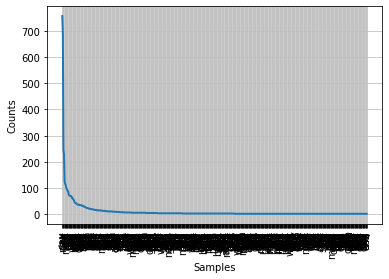

In [173]:
Covid_news_cfdist[3].plot() #t

In [175]:
Covid_cpdist = nltk.ConditionalProbDist(Covid_news_cfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(Covid_cpdist[2].max())

#And its probability
print(Covid_cpdist[2].prob(Covid_cpdist[2].max()))

#This is a weird outcome

ap
0.16988210075026794


In [176]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

def bigramScoring(count, wordsTuple, total):
    return count

In [177]:
Covid_after_march_RD['normalized_tokens_POS'] = [spacy_pos(t) for t in Covid_after_march_RD['Context']]

In [498]:
Covid_before_march_RD['normalized_tokens_POS'] = [spacy_pos(t) for t in Covid_before_march_RD['Context']]

In [461]:
Covid_after_march_RD['normalized_title_POS'] = [spacy_pos(t) for t in Covid_after_march_RD['Title']]
Covid_before_march_RD['normalized_title_POS'] = [spacy_pos(t) for t in Covid_before_march_RD['Title']]

In [462]:
Covid_title_before_cfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in Covid_before_march_RD['normalized_title_POS'].sum())

In [468]:
Covid_title_before_cfdist_POStoWord['NN']

FreqDist({'virus': 465, 'coronavirus': 278, 'news': 140, 'outbreak': 136, 'ship': 119, 'cruise': 109, 'case': 103, 'death': 98, 'toll': 85, 'health': 70, ...})

In [495]:
Covid_title_before_cfdist_POStoWord['JJ']

FreqDist({'new': 188, 'chinese': 77, 'global': 74, 'first': 70, 'novel': 42, 'asian': 38, 'deadly': 35, 'positive': 32, 'top': 30, 'economic': 27, ...})

In [496]:
Covid_title_after_cfdist_POStoWord['NN']

FreqDist({'coronavirus': 331, 'virus': 241, 'news': 141, 'oil': 83, 'travel': 75, 'cruise': 72, 'case': 70, 'outbreak': 69, 'death': 66, 'state': 65, ...})

In [465]:
Covid_title_after_cfdist_POStoWord['JJ']

FreqDist({'new': 118, 'positive': 97, 'first': 49, 'global': 44, 'trump': 40, 'due': 38, 'economic': 26, 'public': 25, 'other': 24, '-': 22, ...})

In [463]:
Covid_title_after_cfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in Covid_after_march_RD['normalized_title_POS'].sum())

In [500]:
list(Covid_cfdist_WordtoPOS.items())[:20]

[(',', FreqDist({',': 5667, '.': 8})),
 ('started', FreqDist({'VBD': 45, 'VBN': 8})),
 ('its', FreqDist({'PRP$': 334})),
 ('lunar', FreqDist({'JJ': 48, 'NN': 2})),
 ('new', FreqDist({'JJ': 798, 'NNP': 94})),
 ('year', FreqDist({'NN': 182, 'NNP': 3, 'JJ': 1})),
 ('festivities', FreqDist({'NNS': 3})),
 ('in', FreqDist({'IN': 3397, 'RP': 27, 'RB': 9, 'NNP': 2})),
 ('subdued', FreqDist({'JJ': 3, 'VBN': 1, 'VBD': 1})),
 ('fashion', FreqDist({'NN': 7, 'NNP': 3})),
 ('after', FreqDist({'IN': 338, 'RB': 4})),
 ('china', FreqDist({'NNP': 1343, 'JJ': 2})),
 ('canceled', FreqDist({'VBN': 15, 'VBD': 7})),
 ('many', FreqDist({'JJ': 93, 'DT': 1})),
 ('large', FreqDist({'JJ': 35})),
 ('-',
  FreqDist({'HYPH': 982, ':': 199, 'JJ': 66, 'SYM': 27, 'NN': 15, ',': 8, 'NNP': 5, 'VB': 3, '.': 2, 'RB': 1})),
 ('scale', FreqDist({'NN': 7, 'VB': 1})),
 ('celebrations', FreqDist({'NNS': 7})),
 ('of', FreqDist({'IN': 3927})),
 ('the', FreqDist({'DT': 9572}))]

In [501]:
list(Before_Covid_cfdist_WordtoPOS.items())[:20] 

[(',', FreqDist({',': 5667, '.': 8})),
 ('started', FreqDist({'VBD': 45, 'VBN': 8})),
 ('its', FreqDist({'PRP$': 334})),
 ('lunar', FreqDist({'JJ': 48, 'NN': 2})),
 ('new', FreqDist({'JJ': 798, 'NNP': 94})),
 ('year', FreqDist({'NN': 182, 'NNP': 3, 'JJ': 1})),
 ('festivities', FreqDist({'NNS': 3})),
 ('in', FreqDist({'IN': 3397, 'RP': 27, 'RB': 9, 'NNP': 2})),
 ('subdued', FreqDist({'JJ': 3, 'VBN': 1, 'VBD': 1})),
 ('fashion', FreqDist({'NN': 7, 'NNP': 3})),
 ('after', FreqDist({'IN': 338, 'RB': 4})),
 ('china', FreqDist({'NNP': 1343, 'JJ': 2})),
 ('canceled', FreqDist({'VBN': 15, 'VBD': 7})),
 ('many', FreqDist({'JJ': 93, 'DT': 1})),
 ('large', FreqDist({'JJ': 35})),
 ('-',
  FreqDist({'HYPH': 982, ':': 199, 'JJ': 66, 'SYM': 27, 'NN': 15, ',': 8, 'NNP': 5, 'VB': 3, '.': 2, 'RB': 1})),
 ('scale', FreqDist({'NN': 7, 'VB': 1})),
 ('celebrations', FreqDist({'NNS': 7})),
 ('of', FreqDist({'IN': 3927})),
 ('the', FreqDist({'DT': 9572}))]

In [178]:
Covid_cfdist_WordtoPOS = nltk.ConditionalFreqDist(Covid_after_march_RD['normalized_tokens_POS'].sum())
list(Covid_cfdist_WordtoPOS.items())[:10] 

[('virus', FreqDist({'NN': 261, 'NNP': 7, 'JJ': 1})),
 ('becomes', FreqDist({'VBZ': 3})),
 ('widespread', FreqDist({'JJ': 13})),
 ('.', FreqDist({'.': 4006, 'NNP': 480, 'NN': 2, 'NFP': 1})),
 ('"', FreqDist({'``': 637, "''": 552})),
 ('3', FreqDist({'CD': 42, 'LS': 1})),
 ('all', FreqDist({'DT': 205, 'RB': 38, 'PDT': 27})),
 ('about', FreqDist({'IN': 297, 'RB': 33, 'RP': 1})),
 ('isolating', FreqDist({'VBG': 3, 'JJ': 1})),
 ('the', FreqDist({'DT': 9480}))]

In [503]:
Covid_cfdist_WordtoPOS = nltk.ConditionalFreqDist(Covid_after_march_RD['normalized_tokens_POS'].sum())
list(Covid_cfdist_WordtoPOS.items())[:20] 

[('virus', FreqDist({'NN': 261, 'NNP': 7, 'JJ': 1})),
 ('becomes', FreqDist({'VBZ': 3})),
 ('widespread', FreqDist({'JJ': 13})),
 ('.', FreqDist({'.': 4004, 'NNP': 480, 'NN': 2, 'NFP': 1})),
 ('"', FreqDist({'``': 637, "''": 552})),
 ('3', FreqDist({'CD': 42, 'LS': 1})),
 ('all', FreqDist({'DT': 205, 'RB': 38, 'PDT': 27})),
 ('about', FreqDist({'IN': 297, 'RB': 33, 'RP': 1})),
 ('isolating', FreqDist({'VBG': 3, 'JJ': 1})),
 ('the', FreqDist({'DT': 9470})),
 ('benjamins', FreqDist({'NNS': 1})),
 ('jerome', FreqDist({'NNP': 7})),
 ('powell', FreqDist({'NNP': 5})),
 ('and', FreqDist({'CC': 2464})),
 ('co.', FreqDist({'NNP': 2})),
 ('are', FreqDist({'VBP': 666})),
 ("n't", FreqDist({'RB': 138})),
 ('just', FreqDist({'RB': 101, 'JJ': 1})),
 ('working', FreqDist({'VBG': 31, 'NN': 2})),
 ('on', FreqDist({'IN': 1385, 'RP': 36, 'RB': 7, 'JJ': 1}))]

In [499]:
Before_Covid_cfdist_WordtoPOS = nltk.ConditionalFreqDist(Covid_before_march_RD['normalized_tokens_POS'].sum())
list(Before_Covid_cfdist_WordtoPOS.items())[:10] 

[(',', FreqDist({',': 5667, '.': 8})),
 ('started', FreqDist({'VBD': 45, 'VBN': 8})),
 ('its', FreqDist({'PRP$': 334})),
 ('lunar', FreqDist({'JJ': 48, 'NN': 2})),
 ('new', FreqDist({'JJ': 798, 'NNP': 94})),
 ('year', FreqDist({'NN': 182, 'NNP': 3, 'JJ': 1})),
 ('festivities', FreqDist({'NNS': 3})),
 ('in', FreqDist({'IN': 3397, 'RP': 27, 'RB': 9, 'NNP': 2})),
 ('subdued', FreqDist({'JJ': 3, 'VBN': 1, 'VBD': 1})),
 ('fashion', FreqDist({'NN': 7, 'NNP': 3}))]

# After March it seems that widespread, all and isolating become frequently distributed among all kinds of news related to covid

In [179]:
Covid_cfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in Covid_after_march_RD['normalized_tokens_POS'].sum())

In [180]:
Covid_cfdist_POStoWord['JJ']

FreqDist({'new': 518, 'novel': 286, 'positive': 251, 'first': 216, 'global': 188, 'other': 160, 'economic': 152, 'last': 134, 'public': 130, 'many': 108, ...})

In [446]:
Covid_cfdist_POStoWord['VB']

FreqDist({'be': 456, 'have': 128, 'help': 97, 'take': 83, 'prevent': 74, 'do': 47, 'contain': 43, 'go': 43, 'combat': 42, 'protect': 42, ...})

In [181]:
Covid_cfdist_POStoWord['NN']

FreqDist({'coronavirus': 1627, 'outbreak': 560, 'spread': 350, 'health': 314, 'virus': 261, 'state': 232, 'world': 216, 'country': 214, 'government': 195, 'number': 193, ...})

In [504]:
Before_Covid_cfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in Covid_before_march_RD['normalized_tokens_POS'].sum())

In [506]:
Before_Covid_cfdist_POStoWord['JJ']

FreqDist({'new': 798, 'novel': 343, 'chinese': 337, 'global': 265, 'first': 235, 'deadly': 198, 'other': 168, 'positive': 140, 'last': 131, 'respiratory': 125, ...})

In [507]:
Before_Covid_cfdist_POStoWord['VB']

FreqDist({'be': 416, 'have': 150, 'spread': 64, 'help': 60, 'take': 58, 'contain': 58, 'prevent': 54, 'get': 48, 'make': 36, 'leave': 34, ...})

In [508]:
Before_Covid_cfdist_POStoWord['NN']

FreqDist({'coronavirus': 1755, 'outbreak': 854, 'virus': 483, 'health': 441, 'spread': 246, 'country': 226, 'number': 210, 'government': 198, 'case': 191, 'ship': 188, ...})

In [184]:
Covid_cpdist_POStoWord = nltk.ConditionalProbDist(Covid_cfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(Covid_cpdist_POStoWord['NN'].max())
#And its probability
print(Covid_cpdist_POStoWord['NN'].prob(Covid_cpdist_POStoWord['NN'].max()))

print(Covid_cpdist_POStoWord['JJ'].max())
print(Covid_cpdist_POStoWord['JJ'].prob(Covid_cpdist_POStoWord['JJ'].max()))


coronavirus
0.07186858316221766
new
0.05939970214228434


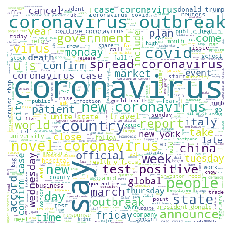

In [187]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(Covid_after_march_RD['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("Covid_after_march_sample_word_cloud.pdf", format = 'pdf')



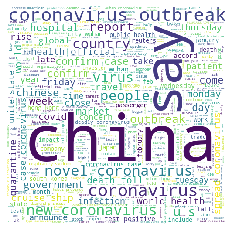

In [452]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(Covid_before_march_RD['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("Covid_before_march_sample_word_cloud.pdf", format = 'pdf')



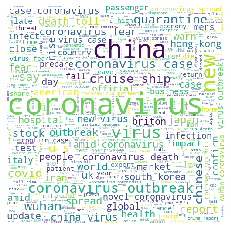

In [458]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(Covid_before_march_RD['normalized_title'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("Covid_after_march_sample_Title_cloud.pdf", format = 'pdf')



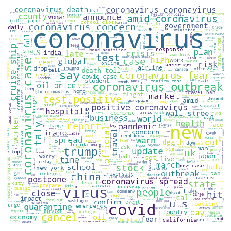

In [459]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(Covid_after_march_RD['normalized_title'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("Covid_after_march_sample_Title_cloud.pdf", format = 'pdf')



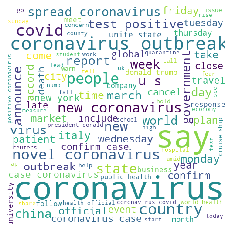

In [188]:
wc = wordcloud.WordCloud(background_color="white", max_words=100, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(Covid_after_march_RD['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("Covid_after_march_sample_word_cloud_100.pdf", format = 'pdf')



# Continue to POS analysis

In [189]:
Covid_after_march_RD['POS_sents'] = Covid_after_march_RD['tokenized_sents'].apply(lambda x: tag_sents_pos(x))

In [509]:
Covid_before_march_RD['POS_sents'] = Covid_before_march_RD['tokenized_sents'].apply(lambda x: tag_sents_pos(x))

In [510]:
countTarget = 'NN'
before_targetCounts = {}
for entry in Covid_before_march_RD['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in before_targetCounts:
                before_targetCounts[ent] += 1
            else:
                before_targetCounts[ent] = 1
before_sortedTargets = sorted(before_targetCounts.items(), key = lambda x: x[1], reverse = True)
before_sortedTargets[:20]

[('coronavirus', 2277),
 ('outbreak', 827),
 ('virus', 482),
 ('health', 383),
 ('spread', 240),
 ('city', 224),
 ('country', 224),
 ('number', 206),
 ('case', 190),
 ('ship', 184),
 ('death', 176),
 ('government', 170),
 ('week', 166),
 ('disease', 161),
 ('world', 160),
 ('cruise', 154),
 ('toll', 135),
 ('year', 131),
 ('travel', 130),
 ('impact', 126)]

In [190]:
countTarget = 'NN'
targetCounts = {}
for entry in Covid_after_march_RD['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('coronavirus', 2091),
 ('outbreak', 495),
 ('spread', 344),
 ('virus', 256),
 ('health', 254),
 ('state', 243),
 ('country', 214),
 ('world', 203),
 ('number', 193),
 ('week', 174),
 ('travel', 156),
 ('government', 152),
 ('case', 141),
 ('disease', 136),
 ('day', 131),
 ('time', 115),
 ('economy', 111),
 ('response', 110),
 ('oil', 107),
 ('pandemic', 105)]

In [472]:
NTarget = 'JJ'
Word = 'china'
NResults = set()
for entry in Covid_after_march_RD['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

{'adversarial', 'central', 'eastern', 'south', 'southeastern'}


In [513]:
NTarget = 'NN'
Word = 'china'
NResults = set()
for entry in Covid_after_march_RD['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

{'mainland', 'pandemic', 'market', 'north', 'coronavirus', 'plunge', 'disease', 'bar', 'lesson', 'consumer', 'province'}


In [514]:
NTarget = 'JJ'
Word = 'china'
NResults = set()
for entry in Covid_before_march_RD['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

{'mainland', 'deadly', 'open', 'central', 'anti', 'provincial', 'north', 'new', 'southern', 'eastern', 'infodemic'}


# With Bigram

In [193]:
Covid_Bigrams = nltk.collocations.BigramCollocationFinder.from_words(Covid_after_march_RD['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(Covid_Bigrams.N))

There are 70596 bigrams in the finder


In [518]:
Before_Covid_Bigrams = nltk.collocations.BigramCollocationFinder.from_words(Covid_before_march_RD['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(Before_Covid_Bigrams.N))

There are 71693 bigrams in the finder


In [520]:
Before_birgramScores = []
def bigramPrinting2(count, wordsTuple, total):
    global Before_birgramScores
    Before_birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank
Before_Covid_Bigrams.nbest(bigramPrinting2, 10)
print('\n'.join(Before_birgramScores[:10]))


The first word is:  96, The second word is: 50
The first word is:  50, The second word is: 893
The first word is:  893, The second word is: 217
The first word is:  217, The second word is: 3
The first word is:  3, The second word is: 5
The first word is:  5, The second word is: 10
The first word is:  10, The second word is: 1346
The first word is:  1346, The second word is: 72
The first word is:  72, The second word is: 75
The first word is:  75, The second word is: 12


In [194]:
birgramScores = []
def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

Covid_Bigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  273, The second word is: 13
The first word is:  13, The second word is: 30
The first word is:  30, The second word is: 1
The first word is:  1, The second word is: 7
The first word is:  7, The second word is: 5
The first word is:  5, The second word is: 2
The first word is:  2, The second word is: 110
The first word is:  110, The second word is: 5
The first word is:  5, The second word is: 155
The first word is:  155, The second word is: 149


In [56]:
CovidReleaseSample['URL'][0]

'https://www.mtexpress.com/news/health/flu-is-widespread-in-idaho/article_63358f32-4209-11ea-bc84-7706a59d4042.html'

In [521]:
bigram_measures2 = nltk.collocations.BigramAssocMeasures()
Before_Covid_Bigrams.score_ngrams(bigram_measures2.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('coronavirus', 'outbreak'), 2083.8071457660903),
 (('novel', 'coronavirus'), 1998.0498846153805),
 (('cruise', 'ship'), 1722.0079827338925),
 (('hong', 'kong'), 1410.7065954955644),
 (('death', 'toll'), 1403.0933909604764),
 (('diamond', 'princess'), 1163.7214855250318),
 (('unite', 'state'), 1150.136282065317),
 (('south', 'korea'), 1093.7004683197863),
 (('test', 'positive'), 1079.5909468427385),
 (('new', 'coronavirus'), 1065.4165598463949),
 (('respiratory', 'syndrome'), 1063.4238719740688),
 (('confirm', 'case'), 1060.3978114913366),
 (('hubei', 'province'), 874.7988512160566),
 (('health', 'official'), 812.7960232547471),
 (('world', 'health'), 756.8319741110331),
 (('middle', 'east'), 756.1737844757864),
 (('public', 'health'), 706.9821675651604),
 (('health', 'organization'), 701.0099348967073),
 (('city', 'wuhan'), 595.6565560334079),
 (('common', 'cold'), 556.204442066396),
 (('white', 'house'), 530.8856108977404),
 (('mainland', 'china'), 500.35928443914725),
 (('control'

In [195]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
Covid_Bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('coronavirus', 'outbreak'), 1922.4574489254283),
 (('test', 'positive'), 1866.8261265059766),
 (('novel', 'coronavirus'), 1702.1896789305204),
 (('donald', 'trump'), 1215.0406191572413),
 (('president', 'donald'), 992.014673564778),
 (('new', 'york'), 968.671623186119),
 (('unite', 'state'), 959.2722098872882),
 (('cruise', 'ship'), 941.9409604563413),
 (('new', 'coronavirus'), 794.8960124315341),
 (('san', 'francisco'), 683.8917692521941),
 (('confirm', 'case'), 655.5275316997568),
 (('prime', 'minister'), 646.0399573954049),
 (('public', 'health'), 621.979630163131),
 (('spread', 'coronavirus'), 595.7556840266893),
 (('white', 'house'), 590.0379183462231),
 (('south', 'korea'), 572.9125199130812),
 (('death', 'toll'), 557.7155229935852),
 (('los', 'angeles'), 542.4120488386251),
 (('oil', 'price'), 525.2438994184956),
 (('hong', 'kong'), 520.9987268043243),
 (('wall', 'street'), 508.9250507478714),
 (('health', 'official'), 502.2264868553449),
 (('saudi', 'arabia'), 496.0860700025

In [196]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
Covid_Bigrams = nltk.collocations.TrigramCollocationFinder.from_words(Covid_after_march_RD['normalized_tokens'].sum())
Covid_Bigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('president', 'donald', 'trump'), 9.433870566523302),
 (('test', 'positive', 'coronavirus'), 9.104016581411459),
 (('world', 'health', 'organization'), 7.070756823683414),
 (('novel', 'coronavirus', 'outbreak'), 6.464395753084094),
 (('spread', 'novel', 'coronavirus'), 6.2296423955503375),
 (('people', 'test', 'positive'), 5.998351443767134),
 (('spread', 'new', 'coronavirus'), 5.878054463536493),
 (('confirm', 'case', 'coronavirus'), 5.725188594130794),
 (('center', 'disease', 'control'), 5.567726272904793),
 (('coronavirus', 'disease', 'covid-19'), 5.552307372702195),
 (('president', 'mike', 'penny'), 5.385150673588601),
 (('vice', 'president', 'mike'), 5.385147617686784),
 (('case', 'novel', 'coronavirus'), 5.271098647243755),
 (('test', 'positive', 'covid-19'), 5.193384271216769),
 (('disease', 'control', 'prevention'), 5.098994221481321),
 (('chief', 'medical', 'officer'), 4.999990176161363),
 (('declare', 'state', 'emergency'), 4.358747909606325),
 (('test', 'positive', 'novel'

In [202]:
Ngrams = nltk.ngrams(Covid_after_march_RD['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('coronavirus', 'spread', 'rapidly', 'outside'): 2, ('spread', 'rapidly', 'outside', 'china'): 4, ('amid', 'fear', 'coronavirus', 'outbreak'): 4, ('nba', 'suspend', 'season', 'notice'): 3, ('suspend', 'season', 'notice', 'utah'): 3, ('season', 'notice', 'utah', 'jazz'): 3, ('notice', 'utah', 'jazz', 'player'): 3, ('utah', 'jazz', 'player', 'test'): 4, ('jazz', 'player', 'test', 'positive'): 4, ('player', 'test', 'positive', 'wednesday'): 4, ('coronavirus', 'come', 'hour', 'majority'): 3, ('come', 'hour', 'majority', 'league'): 3, ('hour', 'majority', 'league', 'owner'): 3, ('majority', 'league', 'owner', 'lean'): 3, ('league', 'owner', 'lean', 'play'): 3, ('owner', 'lean', 'play', 'game'): 3, ('lean', 'play', 'game', 'fan'): 3, ('play', 'game', 'fan', 'arena'): 3, ('state', 'laboratory', 'equip', 'test'): 2, ('laboratory', 'equip', 'test', 'coronavirus'): 2, ('©', 'provide', 'honolulu', 'khnl'): 3, ('provide', 'honolulu', 'khnl', 'state'): 2, ('new', 'case', 'china', 'drop'): 2, ('chi

In [197]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents
Covid_after_march_RD['classified_sents'] = Covid_after_march_RD['tokenized_sents'].apply(lambda x: tag_sents_ner(x))

In [515]:
Covid_before_march_RD['classified_sents'] = Covid_before_march_RD['tokenized_sents'].apply(lambda x: tag_sents_ner(x))

In [517]:
before_entityCounts = {}
for entry in Covid_before_march_RD['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                before_entityCounts[ent] += 1
            else:
                before_entityCounts[ent] = 1
before_sortedEntities = sorted(before_entityCounts.items(), key = lambda x: x[1], reverse = True)
before_sortedEntities[:10]

KeyError: 'China'

In [198]:
entityCounts = {}
for entry in Covid_after_march_RD['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('first', 222),
 ('China', 219),
 ('U.S.', 204),
 ('Monday', 180),
 ('Wednesday', 164),
 ('Thursday', 161),
 ('Tuesday', 153),
 ('Italy', 153),
 ('Friday', 131),
 ('two', 116)]

In [199]:
[x[0] for x in sortedEntities if x[1] == 2] #occur twice

['the Grand Mosque',
 'Muslim',
 '$ 100 million',
 'late Tuesday',
 'Lansing',
 'IEA',
 'April 14 2019',
 'Foreign Ministry',
 'less than 24 hours',
 'the National Institute of Allergy and Infectious Diseases',
 'TfL',
 "the Duchess of Sussex 's",
 'Cineworld',
 'Thursday March 05 2020',
 'U.K.',
 '125',
 'CTV',
 'Air Canada',
 'Fox News',
 'Kelly',
 'Ryan',
 'The Tameron Hall Show and The View',
 'More than 3,000',
 'about 3.4',
 'Saskatoon',
 'SNL',
 'Weeknd',
 'Saturday Night Live',
 '11:35 p.m. Eastern',
 'NBC Copyright © 2020',
 'ICE',
 'late Monday',
 'Peter Hotez',
 'the San Francisco Bay Area',
 'NEW YORK AP Covering',
 'annually',
 'Celine Dion',
 'Saturday February 29',
 '11 years',
 "Wednesday night 's",
 'Variety',
 'Streisand',
 "next week 's",
 'Twenty one',
 'San Francisco Bay',
 'Shinzo Abe',
 'Abe',
 'Palestinians',
 'late Wednesday',
 'the Pittsburgh Penguins',
 'Stephanie Grisham',
 'over two decades',
 '@WCKitchen',
 '1,200',
 'Belgium',
 'Missing',
 'Feb. 28',
 'Ji

In [205]:
nonObjCounts = {}
for entry in Covid_after_march_RD['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

[('first', 222),
 ('China', 219),
 ('U.S.', 204),
 ('Monday', 180),
 ('Wednesday', 164),
 ('Thursday', 161),
 ('Tuesday', 153),
 ('Italy', 153),
 ('Friday', 131),
 ('two', 116)]

In [204]:
CountryCounts = {}
for entry in Covid_after_march_RD['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'GPE':
                continue
            elif ent in CountryCounts:
                CountryCounts[ent] += 1
            else:
                CountryCounts[ent] = 1
sortedCount = sorted(CountryCounts.items(), key = lambda x: x[1], reverse = True)
sortedCount[:10]




# CountryCounts = {}
# for entry in Covid_after_march_RD['classified_sents']:
#     for sentence in entry:
#         for ent, kind in sentence:
#             if kind == 'GPE':
#                 continue
#             elif ent in nonObjCounts:
#                 CountryCounts[ent] += 1
#             else:
#                 CountryCounts[ent] = 1
# sortedCountryObj = sorted(sortedCountryObj.items(), key = lambda x: x[1], reverse = True)
# sortedCountryObj[:10]

[('first', 222),
 ('Monday', 180),
 ('Wednesday', 164),
 ('Thursday', 161),
 ('Tuesday', 153),
 ('Friday', 131),
 ('two', 116),
 ('Coronavirus', 105),
 ('Donald Trump', 99),
 ('one', 96)]

In [207]:
Covid_after_march_RD

level_0   index            Date  \
0      460906  959224  20200307160000   
1      241948  498787  20200303144500   
2       44208   92194  20200304190000   
3      168792  348118  20200309123000   
4      279808  583660  20200312064500   
...       ...     ...             ...   
2995    88331  184407  20200311174500   
2996   434450  905817  20200304014500   
2997   357797  748975  20200311164500   
2998   321223  672032  20200309033000   
2999   212363  436173  20200304193000   

                                                  Title  \
0                    3 Things Under the Radar This Week   
1     Top 10 world news today: Coronavirus spreads r...   
2     How America Can Beat COVID-19 by James K. Galb...   
3     Saudi Arabia to fine people hiding health deta...   
4     NBA suspends season until further notice, over...   
...                                                 ...   
2995  Plenty of labs can now test for coronavirus. B...   
2996  AG Nessel warns Michigan shops of illegal coro...   
2997  Montana Morning State News Headlines for Wedne...   
2998  3 European nations ban large-scale events | NH...   
2999   Looking for hand sanitizer? Good luck finding it   

                                           SharingImage  \
0     https://i-invdn-com.akamaized.net/news/LYNXNPE...   
1                                                   NaN   
2     https://webapi.project-syndicate.org/library/0...   
3     https://s2.reutersmedia.net/resources/r/?m=02&...   
4                                                   NaN   
...                                                 ...   
2995  https://www.arkansasnews.com/storyimage/ZZ/202...   
2996  https://radiocms-images.us1.eldarioncloud.com/...   
2997  https://townsquare.media/site/119/files/2020/0...   
2998  https://www3.nhk.or.jp/nhkworld/common/sns_ima...   
2999  https://www.thetimes-tribune.com/polopoly_fs/1...   

                                                    URL  \
0     https://www.investing.com/news/economy/3-thing...   
1     https://www.msn.com/en-in/news/other/top-10-wo...   
2     https://www.project-syndicate.org/commentary/c...   
3     https://www.reuters.com/article/us-health-coro...   
4     https://www.cochranetoday.ca/world-news/nba-su...   
...                                                 ...   
2995  https://www.arkansasnews.com/zz/news/20200311/...   
2996  https://q106fm.com/news/articles/2020/mar/04/a...   
2997  https://kyssfm.com/montana-morning-state-news-...   
2998  https://www3.nhk.or.jp/nhkworld/en/news/202003...   
2999  https://www.thetimes-tribune.com/looking-for-h...   

                                                Context  \
0     virus becomes widespread." 3. All About Isolat...   
1     Ashraf Ghani standing in front of a store © Pr...   
2     attacked Pearl Harbor, the United States was s...   
3      view of the Grand Mosque which is almost empt...   
4     MIAMI — The NBA has suspended its season "unti...   
...                                                 ...   
2995  A new shortage of a key testing component is h...   
2996  LANSING, MI (WKZO AM/FM) -- Michigan Attorney ...   
2997  that ended in Missoula on Tuesday night. The U...   
2998  European countries have started to ban large-s...   
2999  :02:28 17:18:41 / FILE - In this Feb. 28, 2020...   

                                                   text  \
0     0                      3 Things Under the Rada...   
1     0                      3 Things Under the Rada...   
2     0                      3 Things Under the Rada...   
3     0                      3 Things Under the Rada...   
4     0                      3 Things Under the Rada...   
...                                                 ...   
2995  0                      3 Things Under the Rada...   
2996  0                      3 Things Under the Rada...   
2997  0                      3 Things Under the Rada...   
2998  0                      3 Things Under the Rada...   
2999  0                     

In [210]:
Covid_fierce = {}
for index, row in Covid_after_march_RD.iterrows():
    text = ' '.join(row['tokenized_text'])
    Covid_fierce[row['Context']] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is fight
        if chunk.root.head.text == 'defend':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                Covid_fierce[row['Title']][0].append(subject)
            if object_ is not 0:
                Covid_fierce[row['Title']][1].append(object_)

In [211]:
Covid_fierce

{'3 Things Under the Radar This Week': ([], []),
 'Top 10 world news today: Coronavirus spreads rapidly, Ghani appeals to Taliban and more!': ([],
  []),
 'How America Can Beat COVID-19 by James K. Galbraith': ([], []),
 'Saudi Arabia to fine people hiding health details on entry': ([], []),
 'NBA suspends season until further notice, over coronavirus': ([], []),
 "LIVE: State to ramp up testing for coronavirus in bid to prevent 'community spread'": ([],
  []),
 'Sixth person in US dies from coronavirus': ([], []),
 'Trump administration clashes with airline officials over coronavirus': ([],
  []),
 'Ukrainian Journal': ([], []),
 'Key UN body reaffirms 1995 plan to achieve gender equality': ([], []),
 'UCLA Anderson Forecast downgrades outlook for nation and California as coronavirus takes toll': ([],
  []),
 "Coronavirus: New York Creates 'Containment Area' Around Cluster In New Rochelle": ([],
  []),
 'Kemp seeks $100M to fight CO-VID 19': ([], []),
 'The warmth of chicken soup': ([

In [212]:
import networkx as nx
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [213]:
g = wordCooccurrence(Covid_after_march_RD['normalized_sents'].sum()) #first hundred

In [214]:
nx.to_numpy_matrix(g)[:10, :10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [216]:
nx.write_graphml(g, '../data/Covid_March_words.graphml') #save the vec

In [215]:
Covid_after_march_RD['normalized_sents']

0       [[virus, widespread], [], [isolate, benjamins,...
1       [[ashraf, ghani, stand, store, ©], [provide, w...
2       [[attack, pearl, harbor, unite, state, surpris...
3       [[view, grand, mosque, worshipper, saudi, auth...
4       [[miami, nba, suspend, season, notice, utah, j...
                              ...                        
2995    [[new, shortage, key, test, component, hobble,...
2996    [[lansing, mi, wkzo, fm], [michigan, attorney,...
2997    [[end, missoula, tuesday, night], [university,...
2998    [[european, country, start, ban, large, scale,...
2999    [[02:28, 17:18:41, file], [feb, file, photo, r...
Name: normalized_sents, Length: 2990, dtype: object

In [217]:
Covid_after_march_RD.to_csv('../data/Covid_after_march_RD.csv')

In [218]:
import sklearn.feature_extraction
# in case we get a module not found error
def tokenize(text):
    tokenlist = lucem_illud.word_tokenize(text)
    normalized = lucem_illud.normalizeTokens(tokenlist)
    return normalized

In [220]:
Covid_March_Vectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
Covid_March_Vects_incidence = Covid_March_Vectorizer.fit_transform(Covid_after_march_RD['Context'])

In [221]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((Covid_March_Vectorizer.get_feature_names()[i] for i in range(Covid_March_Vects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(Covid_March_Vects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, Covid_March_Vectorizer.get_feature_names()[w], {'weight' : Covid_March_Vects_incidence[d, w]}) for d, w in zip(*Covid_March_Vects_incidence.nonzero())))

In [ ]:
#IF we draw now, could be a really messy graph

In [222]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [223]:
gDoc = contractNetwork(g_2mode, 'doc')

/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


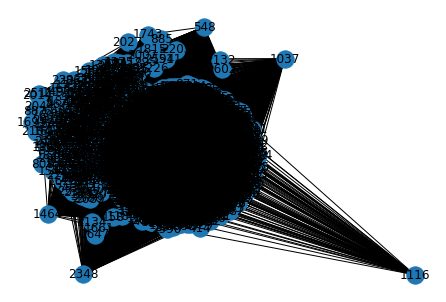

In [224]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}) #Getting labels is a bit annoying

# Looks like 1116 is usper far away from others, let's see what is it    

In [229]:
Covid_after_march_RD['Context'][1116]

"Fears over catching the novel coronavirus has apparently disrupted voting at several locations across the country as Super Tuesday kicks off. According to the Travis County clerk's office"

In [473]:
Covid_after_march_RD['Context'][1037]

"The Bedelsford School in Kingston has closed amid coronavirus concerns as a teacher there was tested for the virus. In a message posted on the special school's website, a spokesperson said that the school "

In [474]:
Covid_after_march_RD['Context'][2348]

'PARIS (AP) — Coronavirus cases surged in Italy, and France closed the world-famous Louvre Museum on Sunday as the deadly outbreak that began in China sent fear rising across '

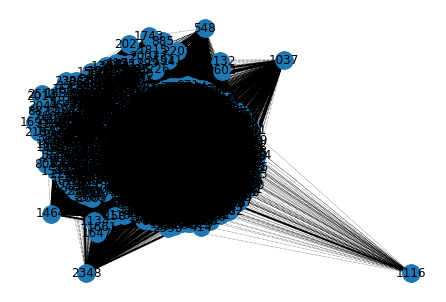

In [230]:
wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=2)

In [231]:
gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 8385
Number of edges: 410002
Average degree:  97.7942


In [232]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean

1.736737869571368

In [233]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 25])

In [234]:
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first

In [235]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [236]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 301
Number of edges: 683
Average degree:   4.5382


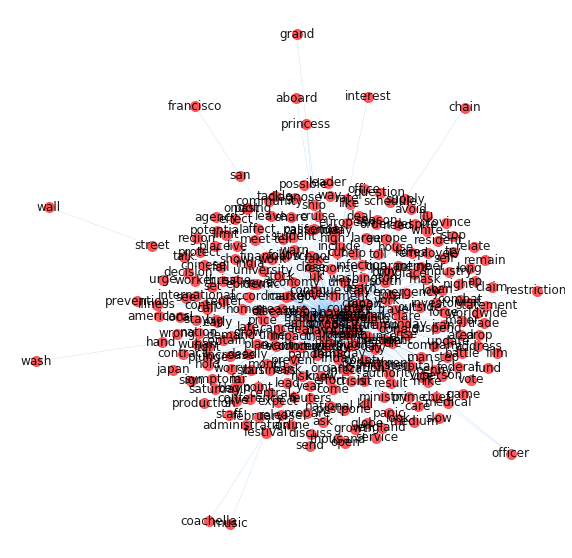

In [237]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [238]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(giant))

In [239]:
giant = nx.Graph(giant)

In [536]:
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 143
Number of edges: 395
Average degree:   5.5245


In [534]:
giant.remove_nodes_from([n for n in giant.nodes if len(set(giant.neighbors(n))) >= 100]) 
giant.remove_nodes_from(list(nx.isolates(giant)))
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 143
Number of edges: 395
Average degree:   5.5245


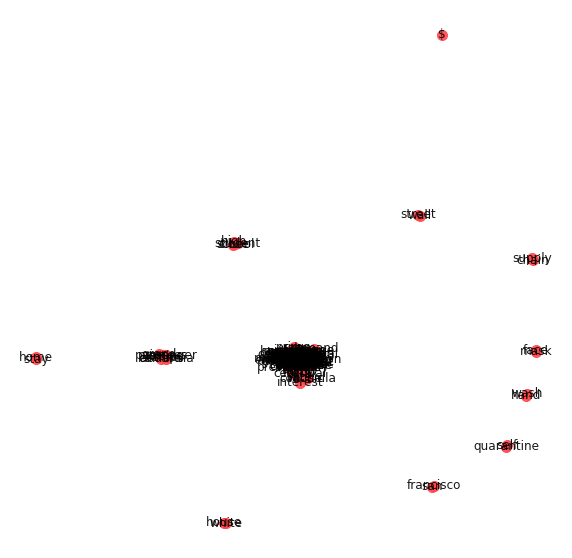

In [535]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [242]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

coronavirus, case, new, covid-19, health, people, novel, say, state, official, spread, outbreak


In [247]:
americanNeighbors = giant.neighbors('china')
g_american = giant.subgraph(americanNeighbors)
print(nx.info(g_american))

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 41
Average degree:   7.4545


In [537]:
americanNeighbors = giant.neighbors('trump')
g_american = giant.subgraph(americanNeighbors)
print(nx.info(g_american))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 8
Average degree:   3.2000


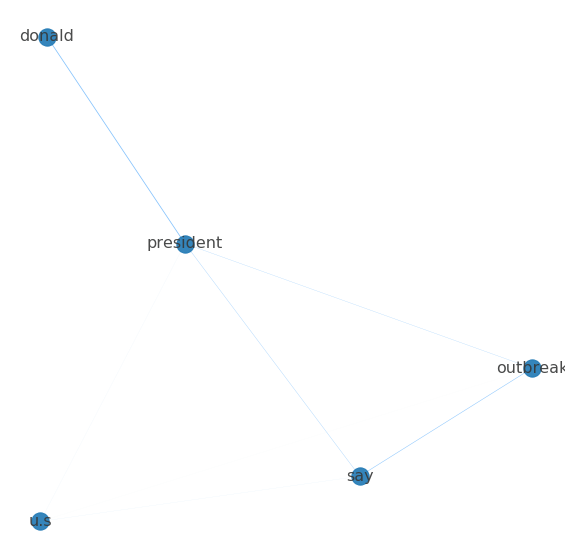

In [538]:
layout_amer = nx.spring_layout(g_american, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_american.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american.edges(data = True)))
nx.draw(g_american, ax = ax, pos = layout_amer, labels = {n:n for n in g_american.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

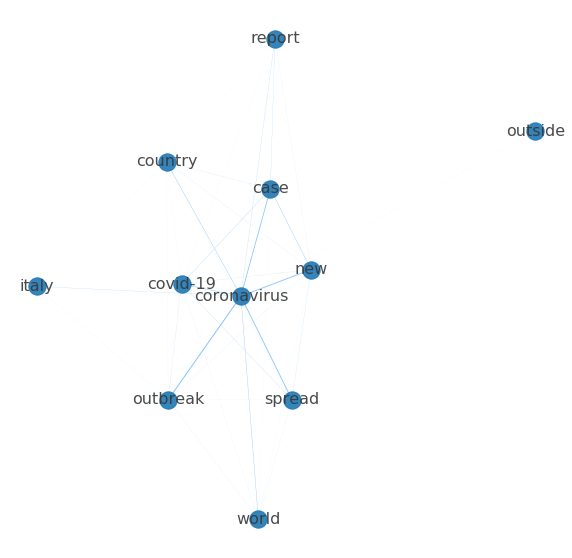

In [248]:
layout_amer = nx.spring_layout(g_american, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_american.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american.edges(data = True)))
nx.draw(g_american, ax = ax, pos = layout_amer, labels = {n:n for n in g_american.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

In [255]:
americanNeighbors = gWord.neighbors('italy')
americanNeighborsPlus1 = set(americanNeighbors)
for n in americanNeighbors:
    americanNeighborsPlus1 |= set(giant.neighbors(n))
    
#for x in americanNeighborsPlus1:
#    print(x)
g_american2 = giant.subgraph(americanNeighborsPlus1)
print(nx.info(g_american2))

Name: 
Type: Graph
Number of nodes: 268
Number of edges: 630
Average degree:   4.7015


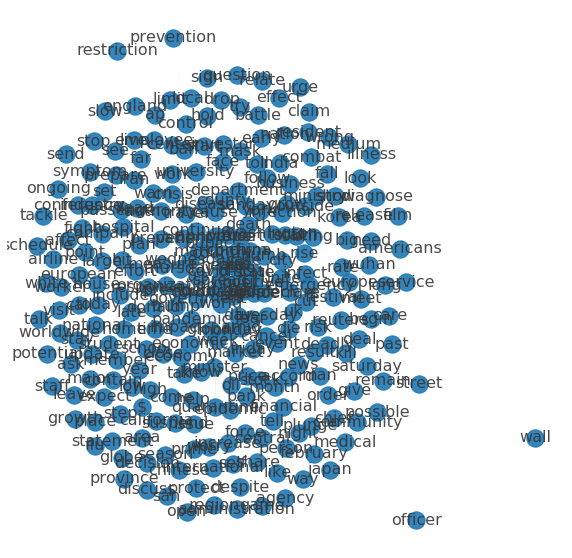

In [256]:
layout_amer = nx.spring_layout(g_american2, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
centralities_amer = nx.eigenvector_centrality(g_american2)
maxC = max(centralities_amer.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
nx.draw(g_american2, ax = ax, pos = layout_amer, labels = {n:n for n in g_american2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american2.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

In [257]:
dcentralities = nx.degree_centrality(giant)

In [263]:
print('Italy',dcentralities['italy'])
print('China',dcentralities['china'])
print('Japan',dcentralities['japan'])

Italy 0.02
China 0.03666666666666667
Japan 0.0033333333333333335


In [264]:
sorted(dcentralities.items(), reverse = True, key = lambda x:x[1])

[('coronavirus', 0.9633333333333334),
 ('case', 0.15000000000000002),
 ('outbreak', 0.14),
 ('new', 0.13333333333333333),
 ('health', 0.12333333333333334),
 ('covid-19', 0.12000000000000001),
 ('spread', 0.11333333333333334),
 ('say', 0.11),
 ('state', 0.08666666666666667),
 ('people', 0.08),
 ('test', 0.05666666666666667),
 ('country', 0.05333333333333334),
 ('novel', 0.05333333333333334),
 ('confirm', 0.05333333333333334),
 ('official', 0.05),
 ('world', 0.05),
 ('president', 0.04),
 ('positive', 0.04),
 ('market', 0.04),
 ('disease', 0.03666666666666667),
 ('china', 0.03666666666666667),
 ('travel', 0.03333333333333333),
 ('report', 0.03333333333333333),
 ('numb', 0.03333333333333333),
 ('u.s', 0.03333333333333333),
 ('concern', 0.03333333333333333),
 ('day', 0.030000000000000002),
 ('death', 0.030000000000000002),
 ('global', 0.030000000000000002),
 ('monday', 0.02666666666666667),
 ('virus', 0.02666666666666667),
 ('price', 0.02666666666666667),
 ('wednesday', 0.023333333333333334

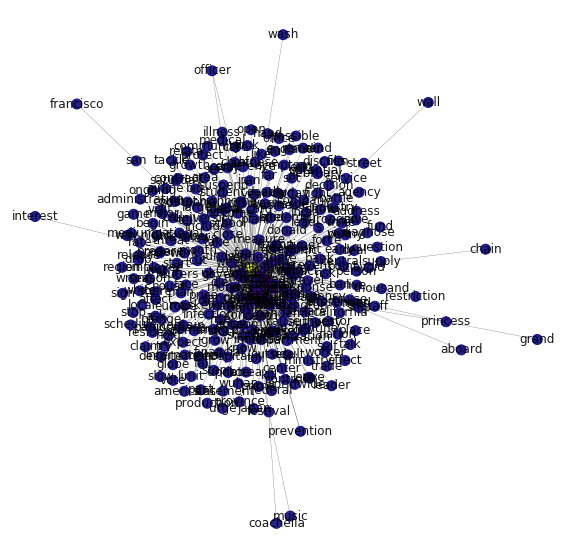

In [265]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(dcentralities.items(), key = lambda x : x[1])[1]
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = [dcentralities[n] / maxC for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

In [522]:
Covid_after_march_RD


level_0   index            Date  \
0      460906  959224  20200307160000   
1      241948  498787  20200303144500   
2       44208   92194  20200304190000   
3      168792  348118  20200309123000   
4      279808  583660  20200312064500   
...       ...     ...             ...   
2995    88331  184407  20200311174500   
2996   434450  905817  20200304014500   
2997   357797  748975  20200311164500   
2998   321223  672032  20200309033000   
2999   212363  436173  20200304193000   

                                                  Title  \
0                    3 Things Under the Radar This Week   
1     Top 10 world news today: Coronavirus spreads r...   
2     How America Can Beat COVID-19 by James K. Galb...   
3     Saudi Arabia to fine people hiding health deta...   
4     NBA suspends season until further notice, over...   
...                                                 ...   
2995  Plenty of labs can now test for coronavirus. B...   
2996  AG Nessel warns Michigan shops of illegal coro...   
2997  Montana Morning State News Headlines for Wedne...   
2998  3 European nations ban large-scale events | NH...   
2999   Looking for hand sanitizer? Good luck finding it   

                                           SharingImage  \
0     https://i-invdn-com.akamaized.net/news/LYNXNPE...   
1                                                   NaN   
2     https://webapi.project-syndicate.org/library/0...   
3     https://s2.reutersmedia.net/resources/r/?m=02&...   
4                                                   NaN   
...                                                 ...   
2995  https://www.arkansasnews.com/storyimage/ZZ/202...   
2996  https://radiocms-images.us1.eldarioncloud.com/...   
2997  https://townsquare.media/site/119/files/2020/0...   
2998  https://www3.nhk.or.jp/nhkworld/common/sns_ima...   
2999  https://www.thetimes-tribune.com/polopoly_fs/1...   

                                                    URL  \
0     https://www.investing.com/news/economy/3-thing...   
1     https://www.msn.com/en-in/news/other/top-10-wo...   
2     https://www.project-syndicate.org/commentary/c...   
3     https://www.reuters.com/article/us-health-coro...   
4     https://www.cochranetoday.ca/world-news/nba-su...   
...                                                 ...   
2995  https://www.arkansasnews.com/zz/news/20200311/...   
2996  https://q106fm.com/news/articles/2020/mar/04/a...   
2997  https://kyssfm.com/montana-morning-state-news-...   
2998  https://www3.nhk.or.jp/nhkworld/en/news/202003...   
2999  https://www.thetimes-tribune.com/looking-for-h...   

                                                Context  \
0     virus becomes widespread." 3. All About Isolat...   
1     Ashraf Ghani standing in front of a store © Pr...   
2     attacked Pearl Harbor, the United States was s...   
3      view of the Grand Mosque which is almost empt...   
4     MIAMI — The NBA has suspended its season "unti...   
...                                                 ...   
2995  A new shortage of a key testing component is h...   
2996  LANSING, MI (WKZO AM/FM) -- Michigan Attorney ...   
2997  that ended in Missoula on Tuesday night. The U...   
2998  European countries have started to ban large-s...   
2999  :02:28 17:18:41 / FILE - In this Feb. 28, 2020...   

                                                   text  \
0     0                      3 Things Under the Rada...   
1     0                      3 Things Under the Rada...   
2     0                      3 Things Under the Rada...   
3     0                      3 Things Under the Rada...   
4     0                      3 Things Under the Rada...   
...                                                 ...   
2995  0                      3 Things Under the Rada...   
2996  0                      3 Things Under the Rada...   
2997  0                      3 Things Under the Rada...   
2998  0                      3 Things Under the Rada...   
2999  0                     

In [541]:

nlp = spacy.load('en')
def posCooccurrence(sentences, *posType, makeMatrix = False):
    words = set()
    reducedSents = []
    #Only using the first kind of POS for each word
    wordsMap = {}
    for sent in sentences:
        s = [(w, t) for w, t in lucem_illud.spacy_pos(sent) if t in posType]
        for w, t in s:
            if w not in wordsMap:
                wordsMap[w] = t
        reducedSent = [w for w, t in s]
        words |= set(reducedSent)
        reducedSents.append(reducedSent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in reducedSents:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        for w in g.nodes:
            g.nodes[w]['bipartite'] = wordsMap[w]
        return g
    
gNN = posCooccurrence(Covid_after_march_RD['normalized_sents'].sum(), 'NN')
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 2603
Number of edges: 27664
Average degree:  21.2555


In [542]:
gNN.remove_edges_from([(n1, n2) for n1, n2, d in gNN.edges(data = True) if d['weight'] <= 2])
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 2603
Number of edges: 2628
Average degree:   2.0192


In [544]:
gNN.remove_nodes_from([n for n in gNN.nodes if len(set(gNN.neighbors(n))) <= 10]) 
print(nx.info(gNN))

Name: 
Type: Graph
Number of nodes: 124
Number of edges: 1388
Average degree:  22.3871


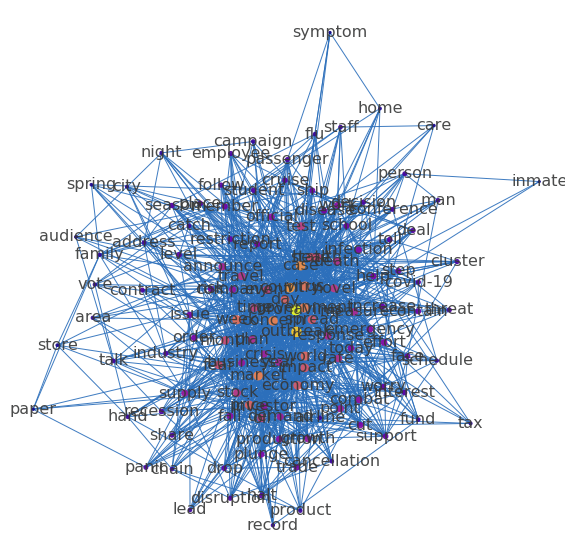

In [545]:
layout_nn = nx.spring_layout(gNN, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nn = nx.eigenvector_centrality(gNN)
maxC = max(centralities_nn.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNN.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNN.edges(data = True)))
nx.draw(gNN, ax = ax, pos = layout_nn, labels = {n: n for n in gNN.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nn[n] / maxC for n in gNN.nodes],
        node_size = [centralities_nn[n] / maxC * 100 for n in gNN.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

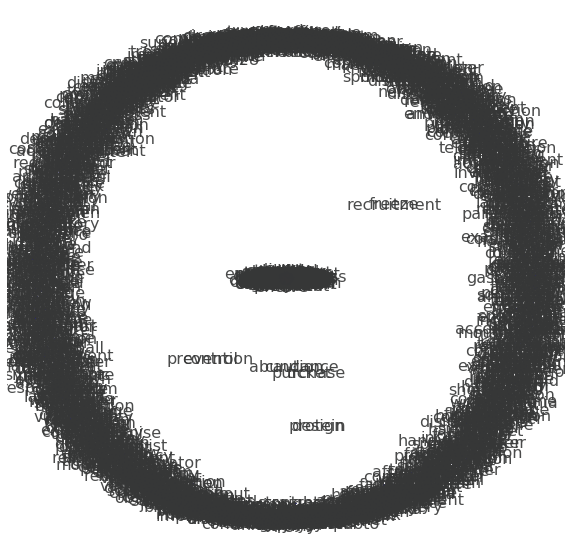

In [543]:
layout_nn = nx.spring_layout(gNN, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nn = nx.eigenvector_centrality(gNN)
maxC = max(centralities_nn.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNN.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNN.edges(data = True)))
nx.draw(gNN, ax = ax, pos = layout_nn, labels = {n: n for n in gNN.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nn[n] / maxC for n in gNN.nodes],
        node_size = [centralities_nn[n] / maxC * 100 for n in gNN.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

In [558]:
gNV = posCooccurrence(Covid_after_march_RD['normalized_sents'].sum(), 'NN', 'VB')

In [547]:
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 2797
Number of edges: 35524
Average degree:  25.4015


In [559]:
gNV.remove_edges_from([(n1,n2) for n1,n2,d in gNV.edges(data = True) if gNV.nodes[n1]['bipartite'] == gNV.nodes[n2]['bipartite']])

print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 2797
Number of edges: 8465
Average degree:   6.0529


In [549]:
gNV.remove_edges_from([(n1, n2) for n1, n2, d in gNV.edges(data = True) if d['weight'] <= 2])
gNV.remove_nodes_from([n for n in gNV.nodes if len(set(gNV.neighbors(n))) <= 5])

In [550]:
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 65
Number of edges: 253
Average degree:   7.7846


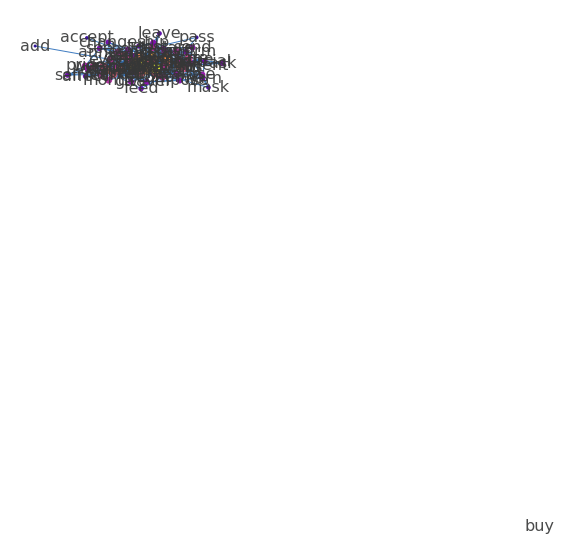

In [551]:
layout_nn = nx.spring_layout(gNV, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nv = nx.eigenvector_centrality(gNV)
maxC = max(centralities_nv.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNV.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNV.edges(data = True)))
nx.draw(gNV, ax = ax, pos = layout_nn, labels = {n: n for n in gNV.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nv[n] / maxC for n in gNV.nodes],
        node_size = [centralities_nv[n] / maxC * 100 for n in gNV.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       ) 

In [49]:
#r = requests.get(CovidReleaseSample['SharingImage'][0]) #for later exploration

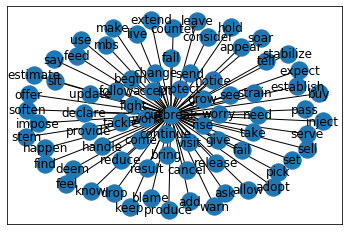

In [570]:
g_i = gNV.subgraph(['outbreak'] + list(gNV.neighbors('outbreak')))
nx.draw_networkx(g_i)

In [ ]:
storyNeighbors = gNV.neighbors('look')
set(storyNeighbors)

# Now we want to compare between pre March and post March, so again, we get  3000 samples before march

In [275]:
BeforeWords = set(Covid_before_march_RD['normalized_tokens'].sum())
AfterWords = set(Covid_after_march_RD['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = BeforeWords & AfterWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
#overlapWordsDict['student']

In [276]:
overlapWordsDict

{'april': 0,
 'territory': 1,
 'resolve': 2,
 'practice': 3,
 'aircraft': 4,
 'review': 5,
 'john': 6,
 'dampen': 7,
 'will': 8,
 'square': 9,
 'r': 10,
 'andrew': 11,
 'growth': 12,
 'h1n1': 13,
 'door': 14,
 'consensus': 15,
 'keep': 16,
 'critical': 17,
 'veronica': 18,
 'gun': 19,
 'supporter': 20,
 'negative': 21,
 'toll': 22,
 'click': 23,
 'gesture': 24,
 'common': 25,
 'borrelli': 26,
 'wish': 27,
 'minister': 28,
 'premier': 29,
 'mid': 30,
 'signal': 31,
 'purpose': 32,
 'clara': 33,
 'economy': 34,
 'mulan': 35,
 'henry': 36,
 'muslim': 37,
 'fame': 38,
 'equip': 39,
 'operational': 40,
 'teacher': 41,
 'news': 42,
 'father': 43,
 'red': 44,
 'barcelona': 45,
 'blow': 46,
 'birmingham': 47,
 'complicate': 48,
 'usual': 49,
 'absolutely': 50,
 'symptom': 51,
 'ministerial': 52,
 'chest': 53,
 'annual': 54,
 'incident': 55,
 'industry': 56,
 'mum': 57,
 'drone': 58,
 'reduction': 59,
 'slash': 60,
 'au': 61,
 'opportunity': 62,
 'simple': 63,
 'safeguard': 64,
 'bureau': 65,
 

In [278]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

BeforeProbArray = makeProbsArray(Covid_before_march_RD['normalized_tokens'], overlapWordsDict)
AfterProbArray = makeProbsArray(Covid_after_march_RD['normalized_tokens'], overlapWordsDict)
BeforeProbArray.sum()
#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

1.0

In [279]:
Before_AfterDivergence = scipy.stats.entropy(BeforeProbArray, AfterProbArray)
print (Before_AfterDivergence)
After_BeforeDivergence = scipy.stats.entropy(AfterProbArray, BeforeProbArray)
print (After_BeforeDivergence)

0.22833031636531406
0.21759650006369904


In [280]:
Before_AfterDivergence_ew = scipy.special.kl_div(BeforeProbArray, AfterProbArray)
BA_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
BA_df = BA_df.sort_index()
BA_df['elementwise divergence'] = Before_AfterDivergence_ew
BA_df[:10]

word  elementwise divergence
0      april                0.000107
1  territory                0.000064
2    resolve                0.000005
3   practice                0.000031
4   aircraft                0.000049
5     review                0.000108
6       john                0.000171
7     dampen                0.000015
8       will                0.000018
9     square                0.000010

In [281]:
BA_df.sort_values(by='elementwise divergence', ascending=False)[:10] 

word  elementwise divergence
2236     china                0.017669
3475     wuhan                0.008507
2993   chinese                0.005726
670   syndrome                0.004177
780       mers                0.003638
4093       feb                0.003095
1969  evacuate                0.002739
3169     march                0.002679
3160  mainland                0.002063
1879  covid-19                0.002045

# As we can see, before March mostly reported is CHina wuhan
there are also something like MERS is mentioned
# We'll then explore difference in the title: so we'll  tokenize those titles next
so far it's only about the context, we'll go to the title now

In [283]:
Covid_after_march_RD.dropna(subset=['Title'],inplace=True)
Covid_before_march_RD.dropna(subset=['Title'],inplace=True)


Covid_after_march_RD['tokenized_title'] = Covid_after_march_RD['Title'].apply(lambda x: lucem_illud.word_tokenize(x))
Covid_before_march_RD['tokenized_title'] = Covid_before_march_RD['Title'].apply(lambda x: lucem_illud.word_tokenize(x))

In [290]:
corpora_before = []
for index, row in Covid_before_march_RD.iterrows():
    if len(corpora_before) > 100:
        break
    corpora_before.append(row['tokenized_title'])
corpora_after = []
for index, row in Covid_after_march_RD.iterrows():
    if len(corpora_after) > 100:
        break
    corpora_after.append(row['tokenized_title'])

In [291]:
corpora_before_s = []
corpora_before_nons = []
for corpus in corpora_before:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_before_s.append(s)
    corpora_before_nons.append(nons)

/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25235 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 31449 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/

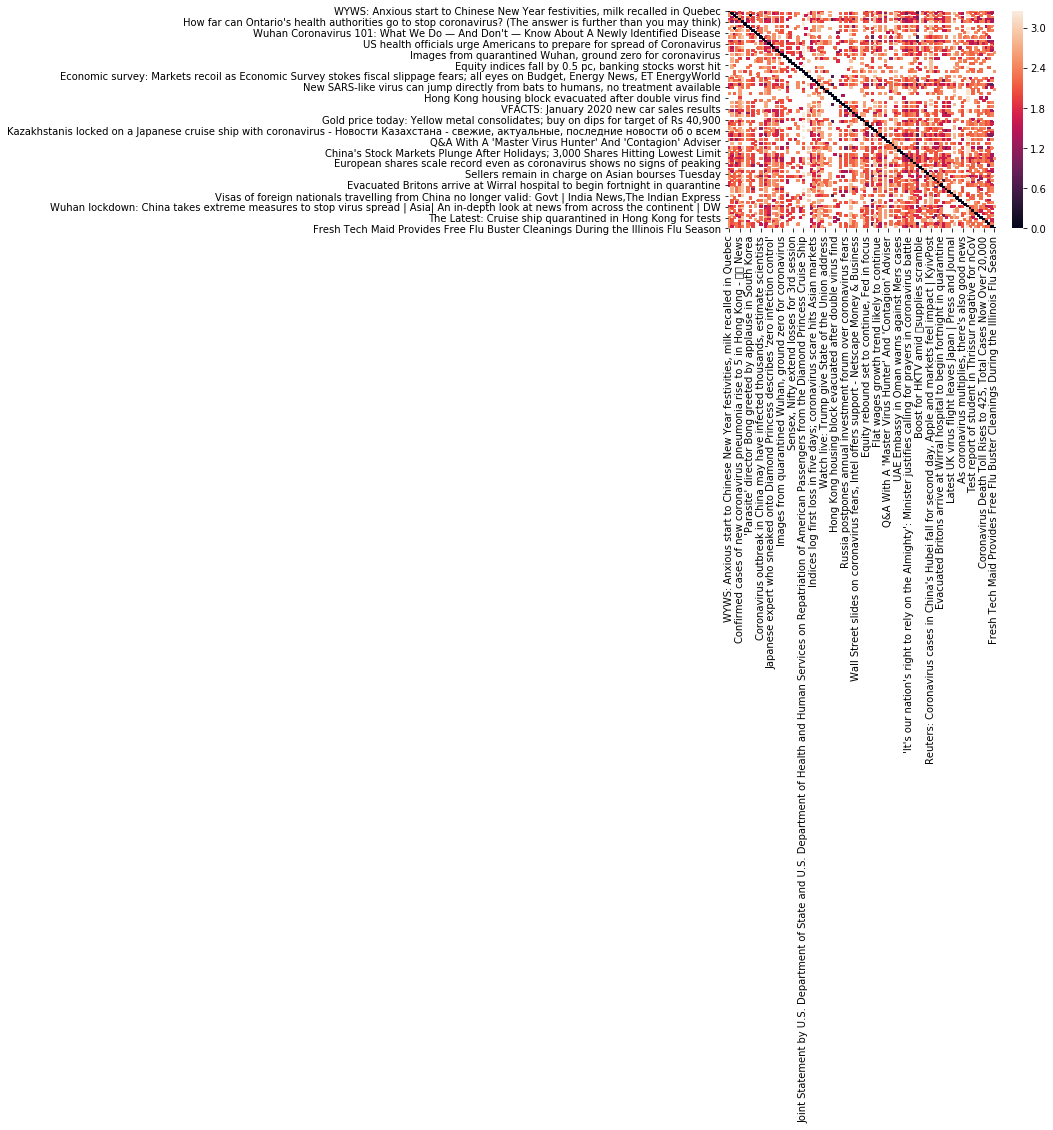

In [292]:
fileids = list(Covid_before_march_RD['Title'][:101])
L = []
for p in corpora_before:
    l = []
    for q in corpora_before:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25235 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 31449 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/

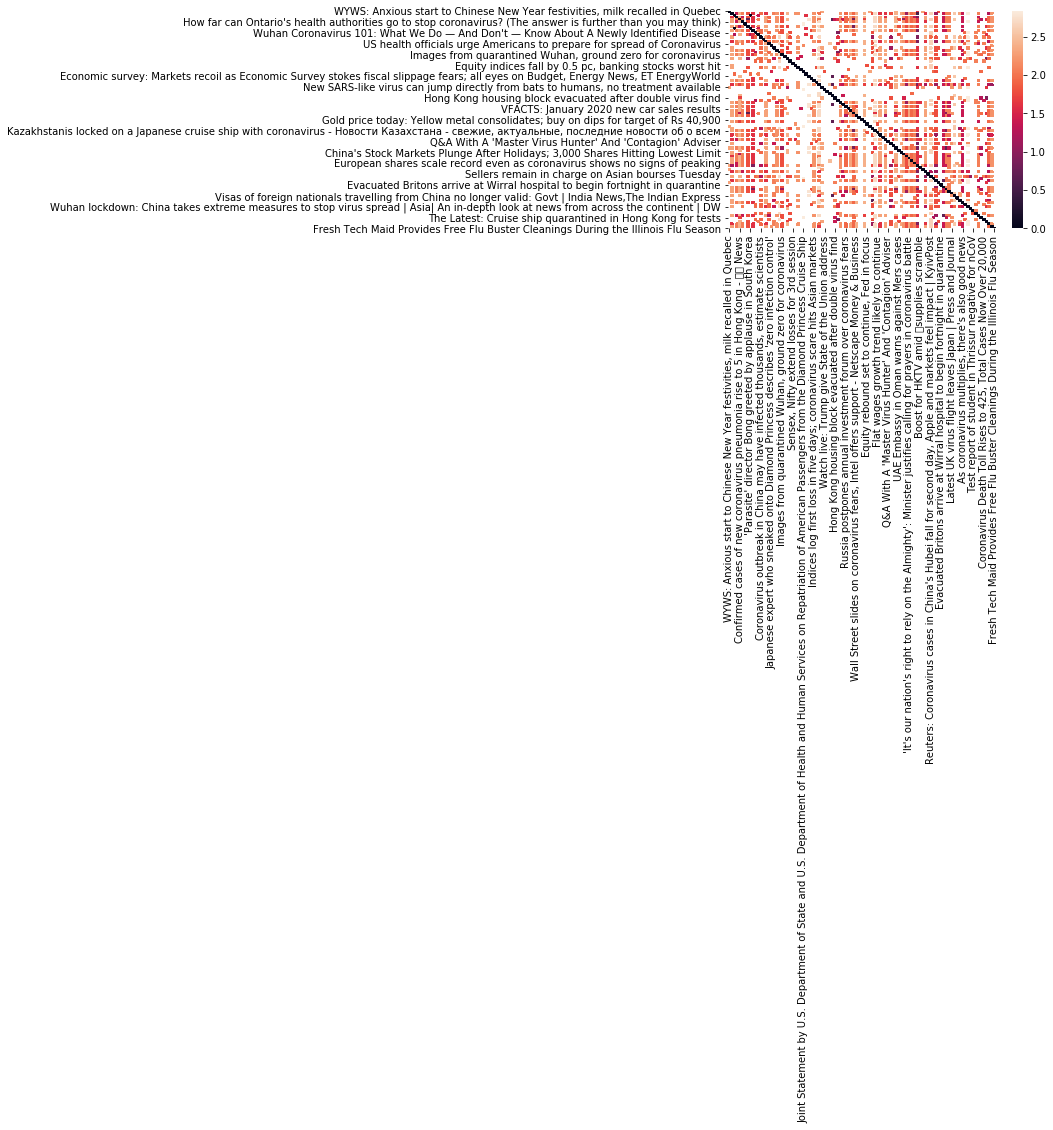

In [296]:
L = []
for p in corpora_before_nons:
    l = []
    for q in corpora_before_nons:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

In [286]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

# It doesn't seem good to view comparison the divergence in heatmaps because there are too many information

# We will proceed to the Vector Space Word Embeddings now to see if we ignore anything previously

In [266]:
import gensim#For word2vec, etc


In [297]:
Covid_after_march_RD_W2V = gensim.models.word2vec.Word2Vec(Covid_after_march_RD['normalized_sents'].sum())

In [607]:
Covid_before_march_RD_W2V = gensim.models.word2vec.Word2Vec(Covid_before_march_RD['normalized_sents'].sum())

In [298]:
Covid_after_march_RD_W2V.wv.syn0

array([[-0.16526161, -0.3423758 ,  0.32742977, ..., -0.15705043,
         0.41017166, -0.00885044],
       [-0.16968665, -0.30123532,  0.35270447, ..., -0.14213651,
         0.458388  , -0.01462625],
       [-0.16006562, -0.3321751 ,  0.33532685, ..., -0.14336981,
         0.4263496 , -0.00361289],
       ...,
       [-0.0146071 , -0.01876016,  0.02967881, ..., -0.00807956,
         0.03255462,  0.00170752],
       [-0.00359897, -0.0136656 ,  0.01210461, ..., -0.0031773 ,
         0.01737481, -0.00068259],
       [-0.01778848, -0.02614811,  0.0357165 , ..., -0.01431383,
         0.03771437, -0.00701754]], dtype=float32)

In [301]:
Covid_after_march_RD_W2V.most_similar('china')

[('infection', 0.9998571872711182),
 ('country', 0.9998531341552734),
 ('know', 0.9998531341552734),
 ('italy', 0.9998424649238586),
 ('virus', 0.9998335838317871),
 ('contain', 0.999824583530426),
 ('far', 0.9998124837875366),
 ('deadly', 0.9998095035552979),
 ('late', 0.9998086094856262),
 ('result', 0.9997908473014832)]

In [608]:
Covid_before_march_RD_W2V.most_similar('china')

[('outbreak', 0.9995651245117188),
 ('spread', 0.9994632005691528),
 ('new', 0.9994623064994812),
 ('deadly', 0.9993192553520203),
 ('coronavirus', 0.9992954134941101),
 ('country', 0.9992502927780151),
 ('mainland', 0.9991669654846191),
 ('originate', 0.9991505146026611),
 ('nearly', 0.9991295337677002),
 ('central', 0.9990066289901733)]

In [475]:
Covid_after_march_RD_W2V.most_similar('italy')

[('south', 0.9998582601547241),
 ('iran', 0.9998435378074646),
 ('china', 0.9998424649238586),
 ('accord', 0.9998396635055542),
 ('group', 0.9998351335525513),
 ('take', 0.9998337030410767),
 ('india', 0.9998254776000977),
 ('quarantine', 0.9998246431350708),
 ('contain', 0.9998238682746887),
 ('citizen', 0.9998223185539246)]

In [477]:
Covid_after_march_RD_W2V.most_similar('japan')

[('government', 0.9998420476913452),
 ('february', 0.9998364448547363),
 ('show', 0.9998345971107483),
 ('month', 0.9998291730880737),
 ('city', 0.9998289346694946),
 ('member', 0.9998284578323364),
 ('come', 0.9998279809951782),
 ('epidemic', 0.9998272061347961),
 ('time', 0.999826192855835),
 ('long', 0.9998260736465454)]

In [609]:
Covid_before_march_RD_W2V.most_similar('japan')

[('quarantine', 0.9992262125015259),
 ('passenger', 0.9989606142044067),
 ('aboard', 0.9982829093933105),
 ('diamond', 0.9980630874633789),
 ('princess', 0.9977914094924927),
 ('coast', 0.9970975518226624),
 ('positive', 0.9961388111114502),
 ('yokohama', 0.9960715770721436),
 ('dock', 0.9958202838897705),
 ('board', 0.9957834482192993)]

In [308]:
Covid_after_march_RD_W2V.most_similar('impact')

[('fear', 0.9998483657836914),
 ('economy', 0.9998447299003601),
 ('economic', 0.9998380541801453),
 ('global', 0.9998265504837036),
 ('demand', 0.999801754951477),
 ('growth', 0.9997991323471069),
 ('help', 0.9997896552085876),
 ('epidemic', 0.9997770190238953),
 ('amid', 0.9997756481170654),
 ('crisis', 0.9997698068618774)]

In [610]:
Covid_before_march_RD_W2V.most_similar('impact')

[('economy', 0.9997366070747375),
 ('fear', 0.9997127056121826),
 ('economic', 0.9997022151947021),
 ('growth', 0.9996875524520874),
 ('concern', 0.999686598777771),
 ('grow', 0.999668300151825),
 ('risk', 0.9996498823165894),
 ('amid', 0.9996328353881836),
 ('epidemic', 0.9996258020401001),
 ('global', 0.9996101260185242)]

In [306]:
Covid_after_march_RD_W2V.most_similar('protect')

[('time', 0.9998971223831177),
 ('company', 0.9998889565467834),
 ('business', 0.9998827576637268),
 ('follow', 0.9998787641525269),
 ('lead', 0.9998750686645508),
 ('month', 0.9998700022697449),
 ('help', 0.9998698234558105),
 ('order', 0.999869704246521),
 ('allow', 0.999866247177124),
 ('look', 0.9998655915260315)]

In [309]:
Covid_after_march_RD_W2V.most_similar('business')

[('plan', 0.999915599822998),
 ('company', 0.9999141097068787),
 ('like', 0.9999098777770996),
 ('time', 0.9999067783355713),
 ('region', 0.9999030828475952),
 ('schedule', 0.999901294708252),
 ('risk', 0.9998959302902222),
 ('year', 0.9998950958251953),
 ('month', 0.9998928308486938),
 ('call', 0.9998924732208252)]

In [310]:
Covid_after_march_RD_W2V.most_similar('damage')

[('threat', 0.999708890914917),
 ('fund', 0.9996862411499023),
 ('trade', 0.9996861815452576),
 ('business', 0.9996851086616516),
 ('time', 0.999684751033783),
 ('major', 0.9996826648712158),
 ('sell', 0.999681830406189),
 ('panic', 0.9996805191040039),
 ('like', 0.9996786117553711),
 ('government', 0.9996748566627502)]

In [611]:
Covid_before_march_RD_W2V.most_similar('damage')

[('threat', 0.9994591474533081),
 ('epidemic', 0.9994426965713501),
 ('growth', 0.9994380474090576),
 ('risk', 0.999433696269989),
 ('level', 0.9994212985038757),
 ('economic', 0.9994149208068848),
 ('major', 0.9994131326675415),
 ('fear', 0.9994120597839355),
 ('possible', 0.9994080662727356),
 ('recent', 0.9994068741798401)]

In [312]:
Covid_after_march_RD_W2V.most_similar('politic')

[('centre', 0.9981379508972168),
 ('information', 0.9981188178062439),
 ('monday', 0.9980744123458862),
 ('control', 0.9980465173721313),
 ('iran', 0.9980393052101135),
 ('page', 0.9980366230010986),
 ('sunday', 0.9980302453041077),
 ('illness', 0.9980279207229614),
 ('federal', 0.9980204105377197),
 ('step', 0.9980181455612183)]

In [481]:
Covid_after_march_RD_W2V.most_similar('sport')

[('force', 0.9997857809066772),
 ('cancel', 0.9997674822807312),
 ('customer', 0.9997640252113342),
 ('week', 0.9997583627700806),
 ('allow', 0.9997556209564209),
 ('company', 0.9997485876083374),
 ('go', 0.9997478723526001),
 ('major', 0.9997477531433105),
 ('make', 0.9997472167015076),
 ('play', 0.9997466802597046)]

In [615]:
Covid_after_march_RD_W2V.most_similar('safe')

[('order', 0.9997894167900085),
 ('international', 0.999789297580719),
 ('call', 0.9997743368148804),
 ('week', 0.9997720718383789),
 ('follow', 0.9997701644897461),
 ('company', 0.999768078327179),
 ('use', 0.999767005443573),
 ('send', 0.9997667074203491),
 ('major', 0.9997655749320984),
 ('store', 0.9997644424438477)]

In [313]:
Covid_after_march_RD_W2V.doesnt_match(['administration', 'administrations', 'presidents', 'president', 'washington'])

'president'

In [314]:
Covid_after_march_RD_W2V.most_similar(positive=['trump', 'republican'], negative = ['democrat'])

[('president', 0.9975409507751465),
 ('vice', 0.9962009191513062),
 ('penny', 0.9954656362533569),
 ('mike', 0.9950989484786987),
 ('handle', 0.9937105774879456),
 ('donald', 0.9934931993484497),
 ('ask', 0.9931057691574097),
 ('reporter', 0.9929949045181274),
 ('ceo', 0.992874264717102),
 ('u.s', 0.9928475022315979)]

In [315]:
Covid_after_march_RD_W2V.save("Covid_after_march_RD_Word2Vec_Title") # save for future use

In [316]:
numWords = 50
targetWords = Covid_after_march_RD_W2V.wv.index2word[:numWords]

In [317]:
Covid_after_wordsSubMatrix = []
for word in targetWords:
    Covid_after_wordsSubMatrix.append(Covid_after_march_RD_W2V[word])
Covid_after_wordsSubMatrix = np.array(Covid_after_wordsSubMatrix)
Covid_after_wordsSubMatrix

array([[-0.16526161, -0.3423758 ,  0.32742977, ..., -0.15705043,
         0.41017166, -0.00885044],
       [-0.16968665, -0.30123532,  0.35270447, ..., -0.14213651,
         0.458388  , -0.01462625],
       [-0.16006562, -0.3321751 ,  0.33532685, ..., -0.14336981,
         0.4263496 , -0.00361289],
       ...,
       [-0.1530621 , -0.27892992,  0.33135414, ..., -0.13798009,
         0.4308027 , -0.01940851],
       [-0.18522182, -0.33137456,  0.37509578, ..., -0.16212699,
         0.4876919 , -0.03017996],
       [-0.12987207, -0.22508179,  0.27194127, ..., -0.11316851,
         0.34777603, -0.01767114]], dtype=float32)

In [318]:
Covid_after_pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(Covid_after_wordsSubMatrix)
Covid_after_reducedPCA_data = Covid_after_pcaWords.transform(Covid_after_wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
Covid_after_tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(Covid_after_reducedPCA_data)

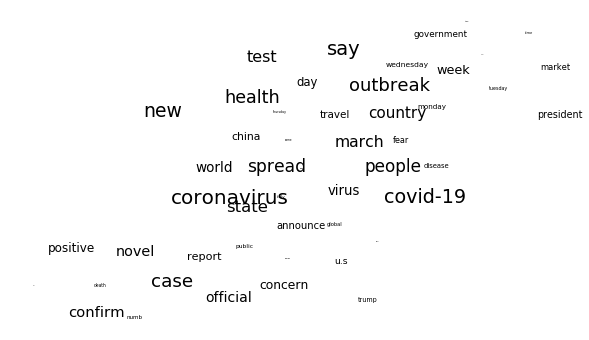

In [319]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(Covid_after_tsneWords[:, 0], Covid_after_tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (Covid_after_tsneWords[:, 0][i],Covid_after_tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [320]:
Covid_before_march_RD

level_0    index            Date  \
0      608354  1167104  20200125143000   
1      414295   793322  20200214171500   
2      403378   772675  20200216220000   
3      564273  1087944  20200228094500   
4      572239  1101812  20200125074500   
...       ...      ...             ...   
2995   148887   286699  20200225103000   
2996    25132    48367  20200124223000   
2997   211225   411614  20200219041500   
2998   557987  1076648  20200225173000   
2999   193083   375849  20200129133000   

                                                  Title  \
0     WYWS: Anxious start to Chinese New Year festiv...   
1     China's economy is expected to slow to worst p...   
2     'Parasite' director Bong greeted by applause i...   
3     Pence's public health record raises concern as...   
4     Confirmed cases of new coronavirus pneumonia r...   
...                                                 ...   
2995  Coronavirus containment window shrinking as vi...   
2996  Staten Island hospitals on high alert for dead...   
2997  MKR Rivals: My Kitchen Rules removed from Sund...   
2998  ADB to grant 130-mln-yuan loan to China's phar...   
2999  Deaths rise to 132 in China outbreak as foreig...   

                                           SharingImage  \
0                                                   NaN   
1     https://static4.businessinsider.com/image/5e46...   
2     https://bloximages.chicago2.vip.townnews.com/d...   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2995  https://www.cp24.com/polopoly_fs/1.4783892.158...   
2996  https://www.silive.com/resizer/6oI9aTfn3NASene...   
2997  https://cdn.newsapi.com.au/image/v1/8b48589ccc...   
2998                                                NaN   
2999  https://myrepublica.nagariknetwork.com/uploads...   

                                                    URL  \
0     https://www.msn.com/en-ca/news/canada/wyws-anx...   
1     https://mrtopstep.com/chinas-economy-is-expect...   
2     https://dailyjournalonline.com/entertainment/m...   
3     https://www.790wpic.com/news/pences-public-hea...   
4     http://english.sina.com/news/2020-01-25/detail...   
...                                                 ...   
2995  https://www.cp24.com/news/coronavirus-containm...   
2996  https://www.silive.com/news/2020/01/staten-isl...   
2997  https://www.ntnews.com.au/news/big-blow-for-my...   
2998  http://www.newstoday.com.bd/index.php?option=d...   
2999  https://myrepublica.nagariknetwork.com/news/de...   

                                                Context  \
0     , started its Lunar New Year festivities in su...   
1     China coronavirus disinfectant A deadly viral ...   
2     virus that has sickened tens of thousands, mos...   
3      single point drop in history Thursday), there...   
4     HONG KONG, Jan. 25 (Xinhua) -- Hong Kong has r...   
...                                                 ...   
2995  OTTAWA - Canada's border measures to guard the...   
2996  STATEN ISLAND, N.Y. – Staten Island hospital p...   
2997  like Koala Rescue and Fire Fight Australia wer...   
2998   Tuesday that it will grant a loan of 130 mill...   
2999   woman developed nausea at the airport and was...   

                                         tokenized_text  \
0     [started, its, Lunar, New, Year, festivities, ...   
1     [China, coronavirus, disinfectant, A, deadly, ...   
2     [virus, that, has, sickened, tens, of, thousan...   
3     [single, point, drop, in, history, Thursday, t...   
4     [HONG, KONG, Jan., 25, Xinhua, Hong, Kong, has...   
...                                                 ...   
2995  [OTTAWA, Canada, 's, border, measures, to, gua...   
2996  [STATEN, ISLAND, N.Y., Staten, Island, hospita...   
2997  [like, Koala, Rescue, and, Fire, Fight, Austra...   
2998  [Tuesday, that, it, will, grant, a, loan, of, ...   
2999  [woman, de

In [328]:
keywords = ['media','business','threat','prevention']

taggedDocs = []
for index, row in Covid_before_march_RD.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_tokens']]
    docKeywords.append(row['Title'])
    docKeywords.append(row['URL']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_tokens'], tags = docKeywords))
Covid_before_march_RD['TaggedContext'] = taggedDocs

In [329]:
Covid_before_march_RD['TaggedContext'] 

0       ([start, lunar, new, year, festivity, subdue, ...
1       ([china, coronavirus, disinfectant, deadly, vi...
2       ([virus, sicken, ten, thousand, china, diligen...
3       ([single, point, drop, history, thursday, myst...
4       ([hong, kong, jan, xinhua, hong, kong, report,...
                              ...                        
2995    ([ottawa, canada, border, measure, guard, coun...
2996    ([staten, island, n.y, staten, island, hospita...
2997    ([like, koala, rescue, fire, fight, australia,...
2998    ([tuesday, grant, loan, yuan, u.s, dollar, chi...
2999    ([woman, develope, nausea, airport, hospitaliz...
Name: TaggedContext, Length: 2990, dtype: object

In [330]:
Covid_before_march_RD['TaggedContext'] [0]

LabeledSentence(words=['start', 'lunar', 'new', 'year', 'festivity', 'subdue', 'fashion', 'china', 'cancel', 'large', 'scale', 'celebration', 'holiday', 'concern', 'coronavirus', 'reach', 'australia', 'australia', 'large', 'city', 'welcome', 'year', 'golden', 'rat', 'statue', 'set', 'entrance', 'downtown'], tags=['WYWS: Anxious start to Chinese New Year festivities, milk recalled in Quebec', 'https://www.msn.com/en-ca/news/canada/wyws-anxious-start-to-chinese-new-year-festivities-milk-recalled-in-quebec/ar-BBZjSjN'])

In [331]:
Covid_before_march_RD[:2]

level_0    index            Date  \
0   608354  1167104  20200125143000   
1   414295   793322  20200214171500   

                                               Title  \
0  WYWS: Anxious start to Chinese New Year festiv...   
1  China's economy is expected to slow to worst p...   

                                        SharingImage  \
0                                                NaN   
1  https://static4.businessinsider.com/image/5e46...   

                                                 URL  \
0  https://www.msn.com/en-ca/news/canada/wyws-anx...   
1  https://mrtopstep.com/chinas-economy-is-expect...   

                                             Context  \
0  , started its Lunar New Year festivities in su...   
1  China coronavirus disinfectant A deadly viral ...   

                                      tokenized_text  \
0  [started, its, Lunar, New, Year, festivities, ...   
1  [China, coronavirus, disinfectant, A, deadly, ...   

                                   normalized_tokens  \
0  [start, lunar, new, year, festivity, subdue, f...   
1  [china, coronavirus, disinfectant, deadly, vir...   

                                     tokenized_sents  \
0  [[started, its, Lunar, New, Year, festivities,...   
1  [[China, coronavirus, disinfectant], [A, deadl...   

                                    normalized_sents  \
0  [[start, lunar, new, year, festivity, subdue, ...   
1  [[china, coronavirus, disinfectant], [deadly, ...   

                                     tokenized_title  \
0  [WYWS, Anxious, start, to, Chinese, New, Year,...   
1  [China, 's, economy, is, expected, to, slow, t...   

                                       TaggedContext  
0  ([start, lunar, new, year, festivity, subdue, ...  
1  ([china, coronavirus, disinfectant, deadly, vi...

In [332]:
Covid_before_D2V = gensim.models.doc2vec.Doc2Vec(Covid_before_march_RD['TaggedContext'], size = 100) #Limiting to 100 dimensions

In [333]:
Covid_before_D2V.docvecs[1952]

array([-6.16804871e-04, -7.43710250e-03,  9.08012129e-03, -1.94081839e-03,
        2.50481348e-02,  5.31089645e-05,  9.67445876e-03,  4.92474437e-03,
        2.58138180e-02, -2.12235656e-02,  7.83506024e-04,  1.69193167e-02,
       -1.54854795e-02, -3.14545399e-03,  8.85251630e-03, -2.78731491e-02,
        5.51390741e-03,  3.28599662e-02, -2.62871431e-03, -1.09483423e-02,
       -5.59255481e-03,  2.13139065e-04, -3.31596658e-02,  5.77106560e-03,
        8.88155866e-03, -3.61090451e-02, -2.05676835e-02, -1.93952490e-03,
        9.38345678e-03, -2.14212444e-02, -2.95170788e-02,  1.30992839e-02,
        1.29680187e-02, -1.57966428e-02,  1.99839100e-02, -1.17314071e-03,
        2.08092202e-03, -2.07100049e-04,  1.92371942e-02,  1.14342582e-03,
       -1.84872430e-02,  1.17815398e-02,  4.63633658e-03,  3.53546836e-03,
        9.01376456e-03, -6.80080010e-03,  7.61006493e-03, -2.02030893e-02,
        1.97923928e-03, -1.86777376e-02,  3.12884222e-03,  3.28304544e-02,
       -7.50854146e-03, -

In [335]:
Covid_before_D2V['tour']

array([ 2.41606180e-02, -4.99272123e-02,  4.13114503e-02, -5.25827073e-02,
        2.04848751e-01, -2.11850889e-02,  9.34876353e-02,  8.34252760e-02,
        2.36353725e-01, -1.33571088e-01,  3.29608694e-02,  1.17392458e-01,
       -9.24996808e-02, -3.78835239e-02,  4.65965420e-02, -2.23924801e-01,
        3.42690870e-02,  3.06676865e-01, -2.01213248e-02, -1.25843585e-01,
       -3.92369665e-02,  1.19003179e-02, -2.65592456e-01,  3.91492955e-02,
        8.86691585e-02, -2.86936402e-01, -1.89070031e-01, -3.17343175e-02,
        5.80517128e-02, -1.55318782e-01, -2.16805428e-01,  7.78204203e-02,
        6.97396696e-02, -1.11115441e-01,  1.35456294e-01,  1.75363310e-02,
        2.55715344e-02,  2.95813102e-02,  1.40407339e-01,  4.80157919e-02,
       -1.89274237e-01,  1.10644504e-01,  1.04111033e-02,  3.48664634e-02,
        5.31997569e-02, -8.76424536e-02,  1.04999155e-01, -1.67633653e-01,
        3.07328068e-02, -1.71484619e-01,  2.36926246e-02,  2.42047042e-01,
       -4.52678055e-02,  

In [336]:
Covid_before_D2V.most_similar(positive = ['threat','china'], negative = ['america'], topn = 1)

#interssting, showing america may also get outbreaks? Trump assign the act on March but this is before March, so apparently media knows this gonna happen

[('outbreak', 0.9993256330490112)]

In [345]:
Covid_before_D2V.docvecs.most_similar([ Covid_before_D2V['japan'] ], topn=5 )

[('Two Britons among thousands quarantined after coronavirus outbreak on cruise',
  0.9988044500350952),
 ('Coronavirus: Cruise ship quarantined at Yokohama now has 135 confirmed cases, including eight Canadians',
  0.9985556602478027),
 ('American cruise passengers quarantined at US military bases',
  0.9983726739883423),
 ('Repatriation flight for Britons on cruise ship to leave Japan on Friday',
  0.998113214969635),
 ('Tom Cruise Mission Impossible: Coronavirus outbreak in Italy stops film production',
  0.9980234503746033)]

In [342]:
Covid_before_D2V.most_similar( [ Covid_before_D2V.docvecs['Tom Cruise Mission Impossible: Coronavirus outbreak in Italy stops film production'] ], topn=5) 

[('work', 0.9998005628585815),
 ('industry', 0.9997932314872742),
 ('flight', 0.9997875690460205),
 ('hotel', 0.9997867941856384),
 ('home', 0.9997864961624146)]

In [364]:
keywords = ['business','threat','prevention']


In [350]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = Covid_before_D2V.docvecs[tagOuter].reshape(1, -1)
    
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, Covid_before_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

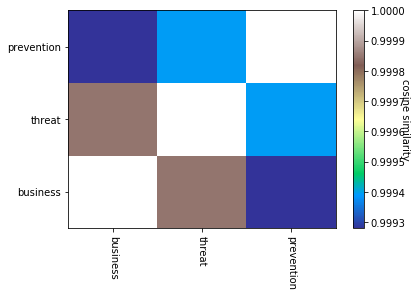

In [351]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

# WOrds doesn't seem to have much inferrence

In [352]:
targetDocs = Covid_before_march_RD['Title'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = Covid_before_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, Covid_before_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25235 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 31449 missing from current font.
  font.set_text(s, 0, flags=flags)


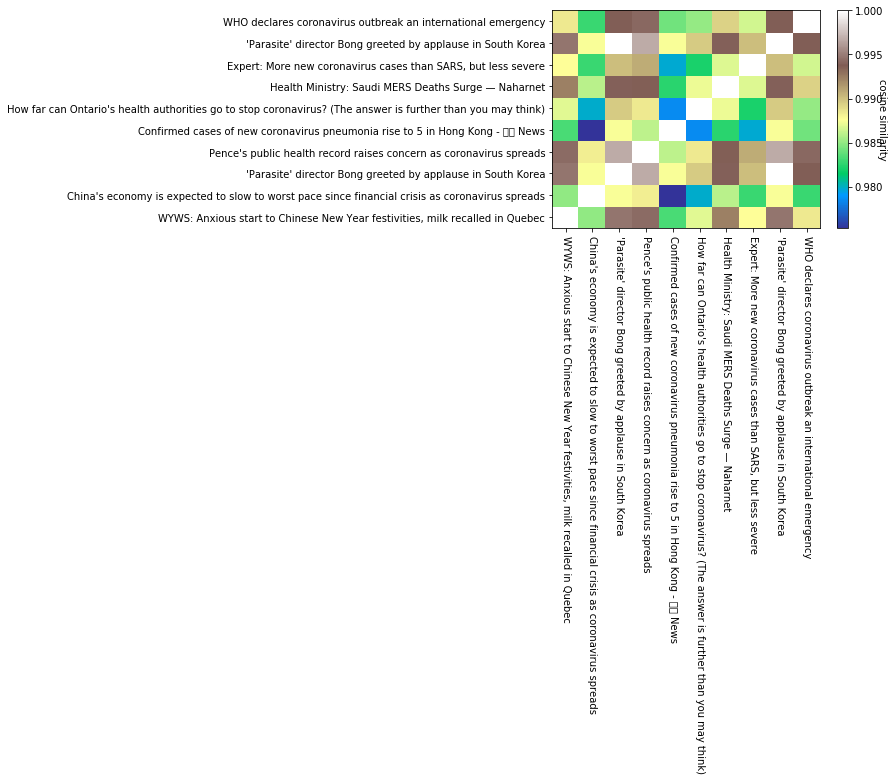

In [353]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [365]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = Covid_before_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, Covid_before_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25235 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 31449 missing from current font.
  font.set_text(s, 0, flags=flags)


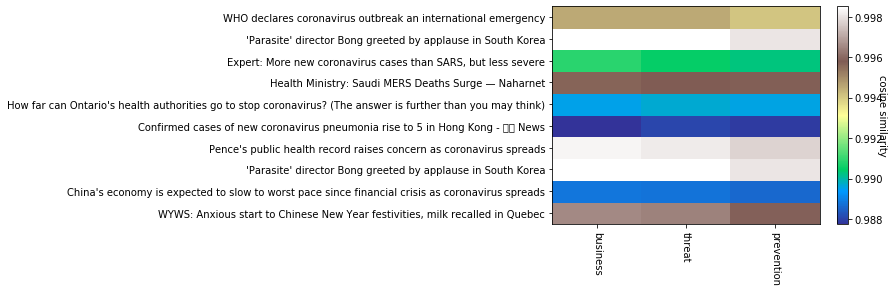

In [355]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

# Then we want to see, what are the news type covering the covid, are they highly consistent with each other?

In [366]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

In [368]:
#First it needs to be initialized
CA_CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
Covid_after_Vects = CA_CountVectorizer.fit_transform(Covid_after_march_RD['Context'])
print(Covid_after_Vects.shape)

(2988, 11055)


In [ ]:

Covid_after_Vects = CA_CountVectorizer.fit_transform(Covid_after_march_RD['Title'])
print(Covid_after_Vects.shape)

In [369]:
#initialize
CA_TFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(Covid_after_Vects)
#train
CA_TF = CA_TFTransformer.transform(Covid_after_Vects)
print(CA_TF.shape)

(2988, 11055)


In [370]:
list(zip(CA_CountVectorizer.vocabulary_.keys(), CA_TF.data))[:20]

[('virus', 0.16424821851119548),
 ('becomes', 0.19086054323439405),
 ('widespread', 0.10405266548859872),
 ('all', 0.07815122082864902),
 ('about', 0.15615886168740528),
 ('isolating', 0.12796231322940887),
 ('the', 0.22843387229105658),
 ('benjamins', 0.22843387229105658),
 ('jerome', 0.21627301320512676),
 ('powell', 0.20764474637112562),
 ('and', 0.05890233176783913),
 ('co', 0.03956864675854676),
 ('aren', 0.18503734443112643),
 ('just', 0.16171214213885013),
 ('working', 0.13280570499412087),
 ('on', 0.20764474637112562),
 ('softening', 0.18170142415520057),
 ('economic', 0.08453484945248212),
 ('impact', 0.22174126858927973),
 ('of', 0.06813294639666699)]

In [576]:
#initialize
CA_TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
CA_TFVects = CA_TFVectorizer.fit_transform(Covid_after_march_RD
['Context'])

In [416]:
#To analyze the news title
CA_title_TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')

CA_Title_TFVects = CA_title_TFVectorizer.fit_transform(Covid_after_march_RD
['Title'])

In [417]:
CA_Title_TFVects.shape

(2988, 1000)

# Now we do an exploring PCA

In [379]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [577]:
numClusters = 6 #4 #we don't have a lot idea, but suppose China a big component, then US, then europe and asia

In [414]:
numClusters_title = 7

In [578]:
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')

In [418]:
km_title = sklearn.cluster.KMeans(n_clusters=numClusters_title, init='k-means++') #default 4 , but this time cluster title

In [579]:
km.fit(CA_TFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [419]:
km_title.fit(CA_Title_TFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [420]:
Covid_after_march_RD['kmeans_predictions_title_7'] = km_title.labels_


In [435]:
Covid_after_march_RD

level_0   index            Date  \
0      460906  959224  20200307160000   
1      241948  498787  20200303144500   
2       44208   92194  20200304190000   
3      168792  348118  20200309123000   
4      279808  583660  20200312064500   
...       ...     ...             ...   
2995    88331  184407  20200311174500   
2996   434450  905817  20200304014500   
2997   357797  748975  20200311164500   
2998   321223  672032  20200309033000   
2999   212363  436173  20200304193000   

                                                  Title  \
0                    3 Things Under the Radar This Week   
1     Top 10 world news today: Coronavirus spreads r...   
2     How America Can Beat COVID-19 by James K. Galb...   
3     Saudi Arabia to fine people hiding health deta...   
4     NBA suspends season until further notice, over...   
...                                                 ...   
2995  Plenty of labs can now test for coronavirus. B...   
2996  AG Nessel warns Michigan shops of illegal coro...   
2997  Montana Morning State News Headlines for Wedne...   
2998  3 European nations ban large-scale events | NH...   
2999   Looking for hand sanitizer? Good luck finding it   

                                           SharingImage  \
0     https://i-invdn-com.akamaized.net/news/LYNXNPE...   
1                                                   NaN   
2     https://webapi.project-syndicate.org/library/0...   
3     https://s2.reutersmedia.net/resources/r/?m=02&...   
4                                                   NaN   
...                                                 ...   
2995  https://www.arkansasnews.com/storyimage/ZZ/202...   
2996  https://radiocms-images.us1.eldarioncloud.com/...   
2997  https://townsquare.media/site/119/files/2020/0...   
2998  https://www3.nhk.or.jp/nhkworld/common/sns_ima...   
2999  https://www.thetimes-tribune.com/polopoly_fs/1...   

                                                    URL  \
0     https://www.investing.com/news/economy/3-thing...   
1     https://www.msn.com/en-in/news/other/top-10-wo...   
2     https://www.project-syndicate.org/commentary/c...   
3     https://www.reuters.com/article/us-health-coro...   
4     https://www.cochranetoday.ca/world-news/nba-su...   
...                                                 ...   
2995  https://www.arkansasnews.com/zz/news/20200311/...   
2996  https://q106fm.com/news/articles/2020/mar/04/a...   
2997  https://kyssfm.com/montana-morning-state-news-...   
2998  https://www3.nhk.or.jp/nhkworld/en/news/202003...   
2999  https://www.thetimes-tribune.com/looking-for-h...   

                                                Context  \
0     virus becomes widespread." 3. All About Isolat...   
1     Ashraf Ghani standing in front of a store © Pr...   
2     attacked Pearl Harbor, the United States was s...   
3      view of the Grand Mosque which is almost empt...   
4     MIAMI — The NBA has suspended its season "unti...   
...                                                 ...   
2995  A new shortage of a key testing component is h...   
2996  LANSING, MI (WKZO AM/FM) -- Michigan Attorney ...   
2997  that ended in Missoula on Tuesday night. The U...   
2998  European countries have started to ban large-s...   
2999  :02:28 17:18:41 / FILE - In this Feb. 28, 2020...   

                                                   text  \
0     0                      3 Things Under the Rada...   
1     0                      3 Things Under the Rada...   
2     0                      3 Things Under the Rada...   
3     0                      3 Things Under the Rada...   
4     0                      3 Things Under the Rada...   
...                                                 ...   
2995  0                      3 Things Under the Rada...   
2996  0                      3 Things Under the Rada...   
2997  0                      3 Things Under the Rada...   
2998  0                      3 Things Under the Rada...   
2999  0                     

In [422]:
terms = CA_title_TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km_title.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters_title):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')
    
#No china as key words in the cluster !?    
#Now we see trump with stocks and travel,  cluster 1 with travel and sports , local activity; 3 with UK out break

Top terms per cluster:
Cluster 0:
 oil
 trump
 stocks
 2020
 march
 market
 says
 prices
 cut
 street


Cluster 1:
 cases
 coronavirus
 uk
 confirmed
 rise
 death
 positive
 confirms
 number
 000


Cluster 2:
 virus
 hit
 italy
 fears
 cruise
 spread
 fight
 ship
 death
 cases


Cluster 3:
 coronavirus
 outbreak
 amid
 concerns
 fears
 trump
 positive
 says
 health
 case


Cluster 4:
 new
 cases
 coronavirus
 york
 reports
 confirmed
 total
 virus
 china
 case


Cluster 5:
 news
 coronavirus
 world
 travel
 daily
 sports
 local
 march
 jobs
 trump


Cluster 6:
 19
 covid
 cases
 positive
 amid
 news
 outbreak
 health
 case
 coronavirus




In [425]:
#Let's test with title PCA
CA_title_PCA = sklearn.decomposition.PCA(n_components = 2).fit(CA_Title_TFVects.toarray())
CA_reducedPCA_data = CA_title_PCA.transform(CA_Title_TFVects.toarray())
#numCategories = 4 # default set as r
Title_colors = list(plt.cm.rainbow(np.linspace(0,1, numClusters_title)))
colors_p = [Title_colors[l] for l in km_title.labels_]

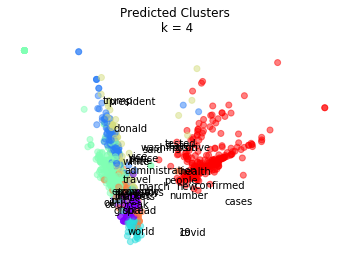

In [426]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.scatter(CA_reducedPCA_data[:, 0], CA_reducedPCA_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(numCategories))
plt.show()

In [405]:
#Covid_after_march_RD['kmeans_predictions'] = km.labels_
Covid_after_march_RD

level_0   index            Date  \
0      460906  959224  20200307160000   
1      241948  498787  20200303144500   
2       44208   92194  20200304190000   
3      168792  348118  20200309123000   
4      279808  583660  20200312064500   
...       ...     ...             ...   
2995    88331  184407  20200311174500   
2996   434450  905817  20200304014500   
2997   357797  748975  20200311164500   
2998   321223  672032  20200309033000   
2999   212363  436173  20200304193000   

                                                  Title  \
0                    3 Things Under the Radar This Week   
1     Top 10 world news today: Coronavirus spreads r...   
2     How America Can Beat COVID-19 by James K. Galb...   
3     Saudi Arabia to fine people hiding health deta...   
4     NBA suspends season until further notice, over...   
...                                                 ...   
2995  Plenty of labs can now test for coronavirus. B...   
2996  AG Nessel warns Michigan shops of illegal coro...   
2997  Montana Morning State News Headlines for Wedne...   
2998  3 European nations ban large-scale events | NH...   
2999   Looking for hand sanitizer? Good luck finding it   

                                           SharingImage  \
0     https://i-invdn-com.akamaized.net/news/LYNXNPE...   
1                                                   NaN   
2     https://webapi.project-syndicate.org/library/0...   
3     https://s2.reutersmedia.net/resources/r/?m=02&...   
4                                                   NaN   
...                                                 ...   
2995  https://www.arkansasnews.com/storyimage/ZZ/202...   
2996  https://radiocms-images.us1.eldarioncloud.com/...   
2997  https://townsquare.media/site/119/files/2020/0...   
2998  https://www3.nhk.or.jp/nhkworld/common/sns_ima...   
2999  https://www.thetimes-tribune.com/polopoly_fs/1...   

                                                    URL  \
0     https://www.investing.com/news/economy/3-thing...   
1     https://www.msn.com/en-in/news/other/top-10-wo...   
2     https://www.project-syndicate.org/commentary/c...   
3     https://www.reuters.com/article/us-health-coro...   
4     https://www.cochranetoday.ca/world-news/nba-su...   
...                                                 ...   
2995  https://www.arkansasnews.com/zz/news/20200311/...   
2996  https://q106fm.com/news/articles/2020/mar/04/a...   
2997  https://kyssfm.com/montana-morning-state-news-...   
2998  https://www3.nhk.or.jp/nhkworld/en/news/202003...   
2999  https://www.thetimes-tribune.com/looking-for-h...   

                                                Context  \
0     virus becomes widespread." 3. All About Isolat...   
1     Ashraf Ghani standing in front of a store © Pr...   
2     attacked Pearl Harbor, the United States was s...   
3      view of the Grand Mosque which is almost empt...   
4     MIAMI — The NBA has suspended its season "unti...   
...                                                 ...   
2995  A new shortage of a key testing component is h...   
2996  LANSING, MI (WKZO AM/FM) -- Michigan Attorney ...   
2997  that ended in Missoula on Tuesday night. The U...   
2998  European countries have started to ban large-s...   
2999  :02:28 17:18:41 / FILE - In this Feb. 28, 2020...   

                                                   text  \
0     0                      3 Things Under the Rada...   
1     0                      3 Things Under the Rada...   
2     0                      3 Things Under the Rada...   
3     0                      3 Things Under the Rada...   
4     0                      3 Things Under the Rada...   
...                                                 ...   
2995  0                      3 Things Under the Rada...   
2996  0                      3 Things Under the Rada...   
2997  0                      3 Things Under the Rada...   
2998  0                      3 Things Under the Rada...   
2999  0                     

In [387]:
terms = CA_TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')
    
    
#Interesting, the first cluster is general health, second be economics, third is Trump!, forth is again health but focus more on test

Top terms per cluster:
Cluster 0:
 outbreak
 spread
 19
 covid
 said
 people
 new
 health
 march
 world


Cluster 1:
 economic
 oil
 markets
 global
 prices
 market
 economy
 outbreak
 impact
 investors


Cluster 2:
 trump
 president
 donald
 vice
 pence
 washington
 travel
 mike
 white
 administration


Cluster 3:
 cases
 confirmed
 new
 health
 19
 covid
 positive
 state
 number
 tested




In [580]:
terms = CA_TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')
    
    
#Interesting, the first cluster is general health, second be economics, third is Trump!, forth is again health but focus more on test

Top terms per cluster:
Cluster 0:
 covid
 19
 health
 disease
 spread
 virus
 people
 said
 state
 outbreak


Cluster 1:
 tested
 positive
 ship
 cruise
 people
 passengers
 princess
 california
 said
 new


Cluster 2:
 oil
 global
 prices
 market
 markets
 economic
 outbreak
 investors
 price
 economy


Cluster 3:
 trump
 president
 donald
 administration
 travel
 washington
 white
 house
 vice
 pence


Cluster 4:
 outbreak
 said
 spread
 people
 new
 health
 march
 concerns
 italy
 government


Cluster 5:
 cases
 confirmed
 new
 number
 health
 reported
 total
 state
 deaths
 china




In [585]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(CA_TFVects.toarray())
reduced_data = pca.transform(CA_TFVects.toarray())

In [586]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [587]:
colordict = {
0: 'red',
1: 'orange',
2: 'green',
3: 'blue',
4: 'yellow',
5: 'pink',
    }
colors = [colordict[c] for c in Covid_after_march_RD
['kmeans_predictions_opt']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([(0, 'red'), (1, 'orange'), (2, 'green'), (3, 'blue'), (4, 'yellow'), (5, 'pink')])


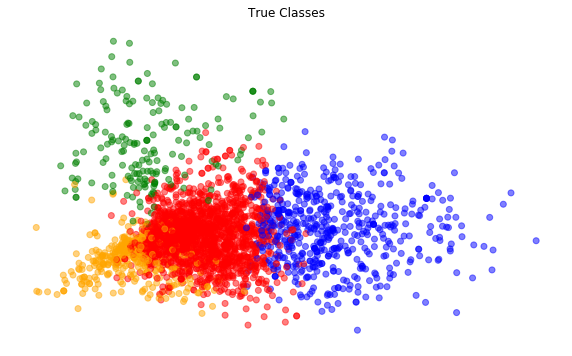

In [391]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [584]:
Covid_after_march_RD['kmeans_predictions_opt'] = km.labels_
Covid_after_march_RD

level_0   index            Date  \
0      460906  959224  20200307160000   
1      241948  498787  20200303144500   
2       44208   92194  20200304190000   
3      168792  348118  20200309123000   
4      279808  583660  20200312064500   
...       ...     ...             ...   
2995    88331  184407  20200311174500   
2996   434450  905817  20200304014500   
2997   357797  748975  20200311164500   
2998   321223  672032  20200309033000   
2999   212363  436173  20200304193000   

                                                  Title  \
0                    3 Things Under the Radar This Week   
1     Top 10 world news today: Coronavirus spreads r...   
2     How America Can Beat COVID-19 by James K. Galb...   
3     Saudi Arabia to fine people hiding health deta...   
4     NBA suspends season until further notice, over...   
...                                                 ...   
2995  Plenty of labs can now test for coronavirus. B...   
2996  AG Nessel warns Michigan shops of illegal coro...   
2997  Montana Morning State News Headlines for Wedne...   
2998  3 European nations ban large-scale events | NH...   
2999   Looking for hand sanitizer? Good luck finding it   

                                           SharingImage  \
0     https://i-invdn-com.akamaized.net/news/LYNXNPE...   
1                                                   NaN   
2     https://webapi.project-syndicate.org/library/0...   
3     https://s2.reutersmedia.net/resources/r/?m=02&...   
4                                                   NaN   
...                                                 ...   
2995  https://www.arkansasnews.com/storyimage/ZZ/202...   
2996  https://radiocms-images.us1.eldarioncloud.com/...   
2997  https://townsquare.media/site/119/files/2020/0...   
2998  https://www3.nhk.or.jp/nhkworld/common/sns_ima...   
2999  https://www.thetimes-tribune.com/polopoly_fs/1...   

                                                    URL  \
0     https://www.investing.com/news/economy/3-thing...   
1     https://www.msn.com/en-in/news/other/top-10-wo...   
2     https://www.project-syndicate.org/commentary/c...   
3     https://www.reuters.com/article/us-health-coro...   
4     https://www.cochranetoday.ca/world-news/nba-su...   
...                                                 ...   
2995  https://www.arkansasnews.com/zz/news/20200311/...   
2996  https://q106fm.com/news/articles/2020/mar/04/a...   
2997  https://kyssfm.com/montana-morning-state-news-...   
2998  https://www3.nhk.or.jp/nhkworld/en/news/202003...   
2999  https://www.thetimes-tribune.com/looking-for-h...   

                                                Context  \
0     virus becomes widespread." 3. All About Isolat...   
1     Ashraf Ghani standing in front of a store © Pr...   
2     attacked Pearl Harbor, the United States was s...   
3      view of the Grand Mosque which is almost empt...   
4     MIAMI — The NBA has suspended its season "unti...   
...                                                 ...   
2995  A new shortage of a key testing component is h...   
2996  LANSING, MI (WKZO AM/FM) -- Michigan Attorney ...   
2997  that ended in Missoula on Tuesday night. The U...   
2998  European countries have started to ban large-s...   
2999  :02:28 17:18:41 / FILE - In this Feb. 28, 2020...   

                                                   text  \
0     0                      3 Things Under the Rada...   
1     0                      3 Things Under the Rada...   
2     0                      3 Things Under the Rada...   
3     0                      3 Things Under the Rada...   
4     0                      3 Things Under the Rada...   
...                                                 ...   
2995  0                      3 Things Under the Rada...   
2996  0                      3 Things Under the Rada...   
2997  0                      3 Things Under the Rada...   
2998  0                      3 Things Under the Rada...   
2999  0                     

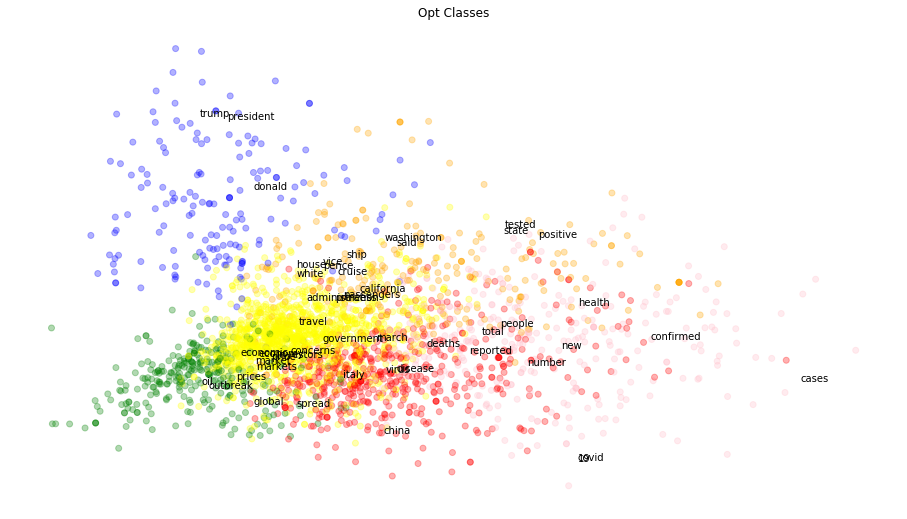

In [588]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('Opt Classes')
plt.show()

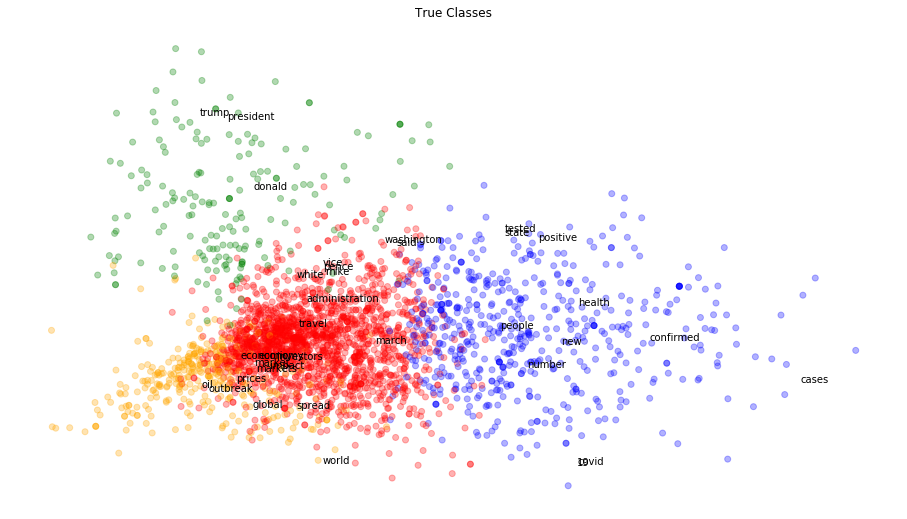

In [392]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

# 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


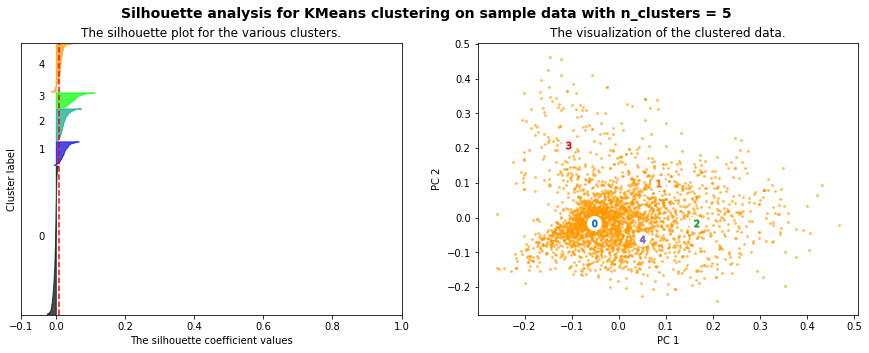

For n_clusters = 5, The average silhouette_score is : 0.008


In [575]:
X = CA_TFVects.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


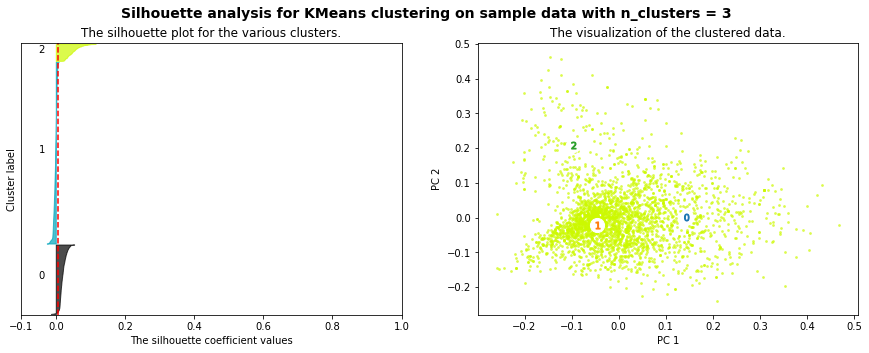

For n_clusters = 3, The average silhouette_score is : 0.007


In [393]:
X = CA_TFVects.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


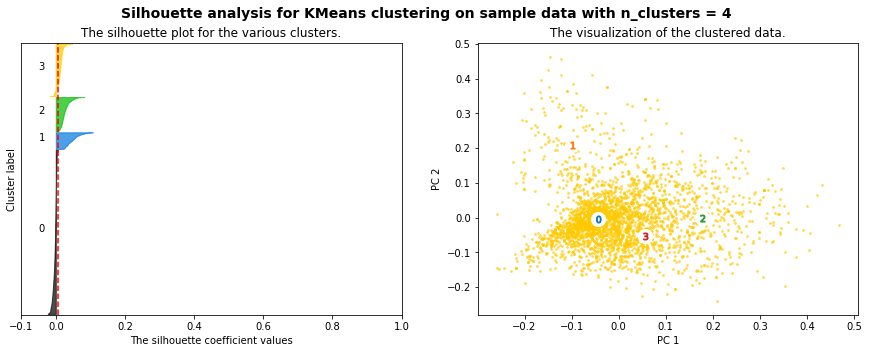

For n_clusters = 4, The average silhouette_score is : 0.007


In [394]:
X = CA_TFVects.toarray()
plotSilhouette(4, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


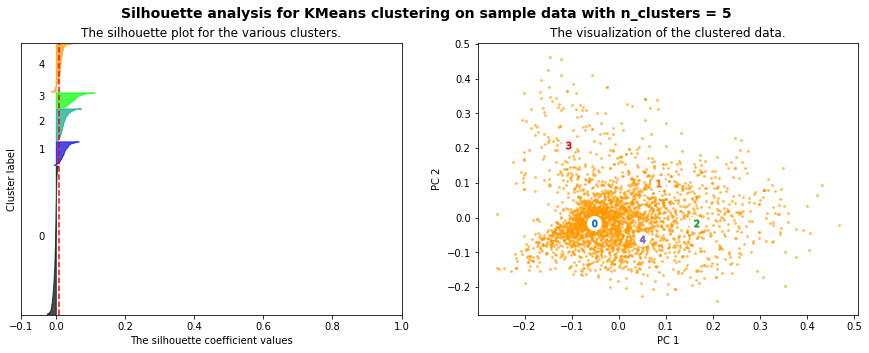

For n_clusters = 5, The average silhouette_score is : 0.008


In [395]:
X = CA_TFVects.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


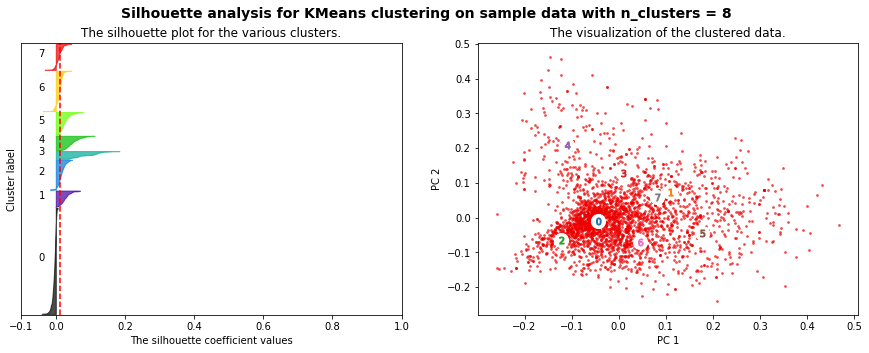

For n_clusters = 8, The average silhouette_score is : 0.012


In [396]:
X = CA_TFVects.toarray()
plotSilhouette(8, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


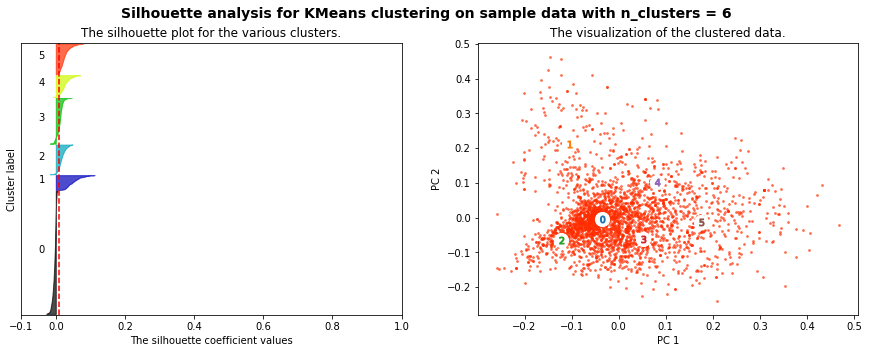

For n_clusters = 6, The average silhouette_score is : 0.010


In [398]:
X = CA_TFVects.toarray()
plotSilhouette(6, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


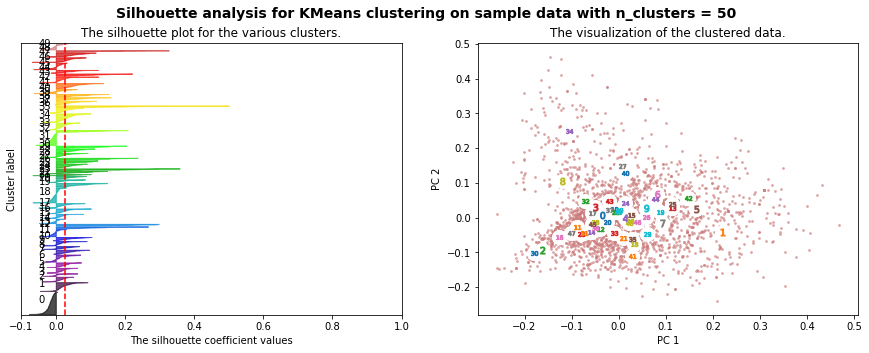

For n_clusters = 50, The average silhouette_score is : 0.028


In [492]:
X = CA_TFVects.toarray()
plotSilhouette(50, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


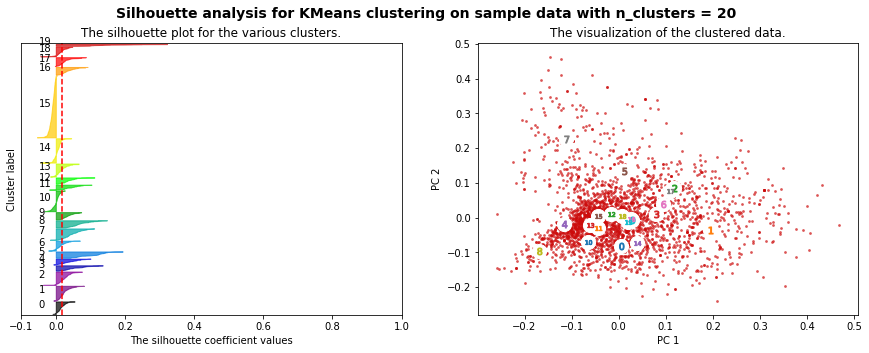

For n_clusters = 20, The average silhouette_score is : 0.018


In [493]:
X = CA_TFVects.toarray()
plotSilhouette(20, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


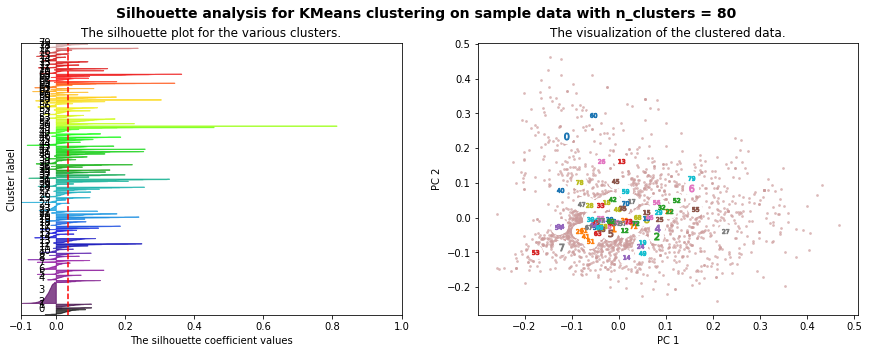

For n_clusters = 80, The average silhouette_score is : 0.035


In [494]:
X = CA_TFVects.toarray()
plotSilhouette(80, X)

In [ ]:
X = CA_TFVects.toarray()
plotSilhouette(160, X)

# Now for hiearchical:

In [436]:
Title_CoocMat = CA_Title_TFVects * CA_Title_TFVects.T
Title_CoocMat.setdiag(0)
Title_linkage_matrix = scipy.cluster.hierarchy.ward(Title_CoocMat.toarray())
Title_hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(Title_linkage_matrix, 7, 'maxclust')

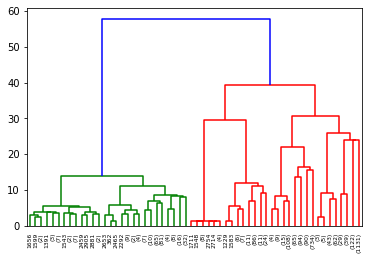

In [437]:
ax = scipy.cluster.hierarchy.dendrogram(Title_linkage_matrix, p=5, truncate_mode='level')

In [438]:
#Here we assume 7clusters are true
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(Covid_after_march_RD['kmeans_predictions_title_7'], Title_hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(Covid_after_march_RD['kmeans_predictions_title_7'], Title_hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(Covid_after_march_RD['kmeans_predictions_title_7'], Title_hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(Covid_after_march_RD['kmeans_predictions_title_7'], Title_hierarchicalClusters_full)))

For our complete clusters:
Homogeneity: 0.460
Completeness: 0.543
V-measure: 0.498
Adjusted Rand Score: 0.422


In [439]:
Covid_after_march_RD['wald_predictions_7'] = Title_hierarchicalClusters_full
Covid_after_march_RD

level_0   index            Date  \
0      460906  959224  20200307160000   
1      241948  498787  20200303144500   
2       44208   92194  20200304190000   
3      168792  348118  20200309123000   
4      279808  583660  20200312064500   
...       ...     ...             ...   
2995    88331  184407  20200311174500   
2996   434450  905817  20200304014500   
2997   357797  748975  20200311164500   
2998   321223  672032  20200309033000   
2999   212363  436173  20200304193000   

                                                  Title  \
0                    3 Things Under the Radar This Week   
1     Top 10 world news today: Coronavirus spreads r...   
2     How America Can Beat COVID-19 by James K. Galb...   
3     Saudi Arabia to fine people hiding health deta...   
4     NBA suspends season until further notice, over...   
...                                                 ...   
2995  Plenty of labs can now test for coronavirus. B...   
2996  AG Nessel warns Michigan shops of illegal coro...   
2997  Montana Morning State News Headlines for Wedne...   
2998  3 European nations ban large-scale events | NH...   
2999   Looking for hand sanitizer? Good luck finding it   

                                           SharingImage  \
0     https://i-invdn-com.akamaized.net/news/LYNXNPE...   
1                                                   NaN   
2     https://webapi.project-syndicate.org/library/0...   
3     https://s2.reutersmedia.net/resources/r/?m=02&...   
4                                                   NaN   
...                                                 ...   
2995  https://www.arkansasnews.com/storyimage/ZZ/202...   
2996  https://radiocms-images.us1.eldarioncloud.com/...   
2997  https://townsquare.media/site/119/files/2020/0...   
2998  https://www3.nhk.or.jp/nhkworld/common/sns_ima...   
2999  https://www.thetimes-tribune.com/polopoly_fs/1...   

                                                    URL  \
0     https://www.investing.com/news/economy/3-thing...   
1     https://www.msn.com/en-in/news/other/top-10-wo...   
2     https://www.project-syndicate.org/commentary/c...   
3     https://www.reuters.com/article/us-health-coro...   
4     https://www.cochranetoday.ca/world-news/nba-su...   
...                                                 ...   
2995  https://www.arkansasnews.com/zz/news/20200311/...   
2996  https://q106fm.com/news/articles/2020/mar/04/a...   
2997  https://kyssfm.com/montana-morning-state-news-...   
2998  https://www3.nhk.or.jp/nhkworld/en/news/202003...   
2999  https://www.thetimes-tribune.com/looking-for-h...   

                                                Context  \
0     virus becomes widespread." 3. All About Isolat...   
1     Ashraf Ghani standing in front of a store © Pr...   
2     attacked Pearl Harbor, the United States was s...   
3      view of the Grand Mosque which is almost empt...   
4     MIAMI — The NBA has suspended its season "unti...   
...                                                 ...   
2995  A new shortage of a key testing component is h...   
2996  LANSING, MI (WKZO AM/FM) -- Michigan Attorney ...   
2997  that ended in Missoula on Tuesday night. The U...   
2998  European countries have started to ban large-s...   
2999  :02:28 17:18:41 / FILE - In this Feb. 28, 2020...   

                                                   text  \
0     0                      3 Things Under the Rada...   
1     0                      3 Things Under the Rada...   
2     0                      3 Things Under the Rada...   
3     0                      3 Things Under the Rada...   
4     0                      3 Things Under the Rada...   
...                                                 ...   
2995  0                      3 Things Under the Rada...   
2996  0                      3 Things Under the Rada...   
2997  0                      3 Things Under the Rada...   
2998  0                      3 Things Under the Rada...   
2999  0                     

# Next we perform topic modelling, first with context

In [440]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

Covid_after_march_RD['reduced_tokens'] = Covid_after_march_RD['normalized_tokens'].apply(lambda x: dropMissing(x, CA_TFVectorizer.vocabulary_.keys()))

In [441]:
Covid_after_march_RD

level_0   index            Date  \
0      460906  959224  20200307160000   
1      241948  498787  20200303144500   
2       44208   92194  20200304190000   
3      168792  348118  20200309123000   
4      279808  583660  20200312064500   
...       ...     ...             ...   
2995    88331  184407  20200311174500   
2996   434450  905817  20200304014500   
2997   357797  748975  20200311164500   
2998   321223  672032  20200309033000   
2999   212363  436173  20200304193000   

                                                  Title  \
0                    3 Things Under the Radar This Week   
1     Top 10 world news today: Coronavirus spreads r...   
2     How America Can Beat COVID-19 by James K. Galb...   
3     Saudi Arabia to fine people hiding health deta...   
4     NBA suspends season until further notice, over...   
...                                                 ...   
2995  Plenty of labs can now test for coronavirus. B...   
2996  AG Nessel warns Michigan shops of illegal coro...   
2997  Montana Morning State News Headlines for Wedne...   
2998  3 European nations ban large-scale events | NH...   
2999   Looking for hand sanitizer? Good luck finding it   

                                           SharingImage  \
0     https://i-invdn-com.akamaized.net/news/LYNXNPE...   
1                                                   NaN   
2     https://webapi.project-syndicate.org/library/0...   
3     https://s2.reutersmedia.net/resources/r/?m=02&...   
4                                                   NaN   
...                                                 ...   
2995  https://www.arkansasnews.com/storyimage/ZZ/202...   
2996  https://radiocms-images.us1.eldarioncloud.com/...   
2997  https://townsquare.media/site/119/files/2020/0...   
2998  https://www3.nhk.or.jp/nhkworld/common/sns_ima...   
2999  https://www.thetimes-tribune.com/polopoly_fs/1...   

                                                    URL  \
0     https://www.investing.com/news/economy/3-thing...   
1     https://www.msn.com/en-in/news/other/top-10-wo...   
2     https://www.project-syndicate.org/commentary/c...   
3     https://www.reuters.com/article/us-health-coro...   
4     https://www.cochranetoday.ca/world-news/nba-su...   
...                                                 ...   
2995  https://www.arkansasnews.com/zz/news/20200311/...   
2996  https://q106fm.com/news/articles/2020/mar/04/a...   
2997  https://kyssfm.com/montana-morning-state-news-...   
2998  https://www3.nhk.or.jp/nhkworld/en/news/202003...   
2999  https://www.thetimes-tribune.com/looking-for-h...   

                                                Context  \
0     virus becomes widespread." 3. All About Isolat...   
1     Ashraf Ghani standing in front of a store © Pr...   
2     attacked Pearl Harbor, the United States was s...   
3      view of the Grand Mosque which is almost empt...   
4     MIAMI — The NBA has suspended its season "unti...   
...                                                 ...   
2995  A new shortage of a key testing component is h...   
2996  LANSING, MI (WKZO AM/FM) -- Michigan Attorney ...   
2997  that ended in Missoula on Tuesday night. The U...   
2998  European countries have started to ban large-s...   
2999  :02:28 17:18:41 / FILE - In this Feb. 28, 2020...   

                                                   text  \
0     0                      3 Things Under the Rada...   
1     0                      3 Things Under the Rada...   
2     0                      3 Things Under the Rada...   
3     0                      3 Things Under the Rada...   
4     0                      3 Things Under the Rada...   
...                                                 ...   
2995  0                      3 Things Under the Rada...   
2996  0                      3 Things Under the Rada...   
2997  0                      3 Things Under the Rada...   
2998  0                      3 Things Under the Rada...   
2999  0                     

In [442]:
CA_Contxt_dictionary = gensim.corpora.Dictionary(Covid_after_march_RD['reduced_tokens'])

In [443]:
corpus = [CA_Contxt_dictionary.doc2bow(text) for text in Covid_after_march_RD['reduced_tokens']]

In [444]:
gensim.corpora.MmCorpus.serialize('CA_context.mm', corpus)
CA_context_mm = gensim.corpora.MmCorpus('CA_context.mm')

In [602]:
#CA_context_lda = gensim.models.ldamodel.LdaModel(corpus=CA_context_mm, id2word=CA_Contxt_dictionary, num_topics=10, alpha='auto', eta='auto')
CA_context_lda = gensim.models.ldamodel.LdaModel(corpus=CA_context_mm, id2word=CA_Contxt_dictionary, num_topics=7, alpha='auto', eta='auto')

#CA_context_lda = gensim.models.ldamodel.LdaModel(corpus=CA_context_mm, id2word=CA_Contxt_dictionary, num_topics=4, alpha='auto', eta='auto')

In [603]:
CA_context_ldaDF = pandas.DataFrame({
        'name' : Covid_after_march_RD['Title'],
        'topics' : [CA_context_lda[CA_Contxt_dictionary.doc2bow(l)] for l in Covid_after_march_RD['reduced_tokens']]
    })

In [604]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(CA_context_ldaDF) for i in range(CA_context_lda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(CA_context_ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(CA_context_lda.num_topics):
    CA_context_ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

CA_context_ldaDF[1::100]

name  \
1     Top 10 world news today: Coronavirus spreads r...   
103   Pence says US tracking another cruise ship ove...   
203   EU ministers seek united front to tackle medic...   
303   Why so many epidemics originate in Asia and Af...   
403   Patient No. 1 is out of ICU as virus pushes It...   
503   Death of fourth patient with coronavirus as mi...   
603   'A mess': Coronavirus economic impact on Phili...   
703   Man in Washington State 1st in US to Die from ...   
805   Kids Around The World Are Reading NPR's Corona...   
907   Person in north suburban Glencoe being monitor...   
1007  U.S. markets seen robust despite surging volum...   
1108  New York state coronavirus cases double, Senat...   
1208  Coronavirus: Northern Italy to quarantine 16 m...   
1308  Trump defends holding campaign rallies even as...   
1408  Blue Jackets to comply with order, play withou...   
1509  Wall Street circuit breakers trip ... markets,...   
1609  Coalition's salary scandal shows why we need n...   
1709  'Isko' to 'self-quarantine' after returning fr...   
1810  Queen's Hospital and King George Hospital emer...   
1910  B.C. records 9th COVID-19 case as Wash. state ...   
2010  Poland's GDP growth could dip this year due to...   
2110  Facing recession, Europe grasps for ways to li...   
2210  Medical staff draw picture of hope at Wuhan ho...   
2310                               Pangan: Game changer   
2411  Bosnia Records First Cases Of Coronavirus, Man...   
2511  Frustration rising over lack of access to coro...   
2612  Peel Health warns select passengers may have b...   
2712  Factbox: China's fight against novel coronavir...   
2812  California prepares to dock cruise ship with 2...   
2913            Nine further coronavirus cases in Wales   

                                                 topics   topic_0   topic_1  \
1                                      [(2, 0.9527952)]  0.000000  0.000000   
103                                    [(5, 0.9673667)]  0.000000  0.000000   
203                                    [(1, 0.9657809)]  0.000000  0.965781   
303   [(1, 0.58460736), (2, 0.010001247), (4, 0.2589...  0.000000  0.584607   
403                  [(2, 0.48349702), (3, 0.48194784)]  0.000000  0.000000   
503                                    [(4, 0.9658894)]  0.000000  0.000000   
603                  [(2, 0.59335583), (5, 0.37528935)]  0.000000  0.000000   
703                   [(4, 0.51352376), (6, 0.4491374)]  0.000000  0.000000   
805   [(0, 0.013462581), (1, 0.014570349), (2, 0.565...  0.013463  0.014570   
907                                    [(6, 0.9548535)]  0.000000  0.000000   
1007                   [(0, 0.6137029), (4, 0.3591942)]  0.613703  0.000000   
1108                 [(2, 0.31850356), (6, 0.64818347)]  0.000000  0.000000   
1208                 [(0, 0.22484063), (1, 0.74448735)]  0.224841  0.744487   
1308  [(0, 0.3787668), (3, 0.46956858), (4, 0.129008...  0.378767  0.000000   
1408                                  [(6, 0.95815545)]  0.000000  0.000000   
1509                 [(4, 0.11787481), (5, 0.86007774)]  0.000000  0.000000   
1609                  [(0, 0.6868767), (4, 0.27808395)]  0.686877  0.000000   
1709                                   [(4, 0.9636994)]  0.000000  0.000000   
1810                                   [(2, 0.9565164)]  0.000000  0.000000   
1910                 [(1, 0.47372633), (6, 0.49153793)]  0.000000  0.473726   
2010                                  [(1, 0.95497507)]  0.000000  0.954975   
2110                 [(0, 0.63200754), (5, 0.34902686)]  0.632008  0.000000   
2210                                   [(3, 0.9535067)]  0.000000  0.000000   
2310  [(0, 0.0158377), (1, 0.017140532), (2, 0.02057...  0.015838  0.017141   
2411                 [(2, 0.010002575), (6, 0.9509795)]  0.000000  0.000000   
2511                [(2, 0.010933692), (5, 0.94595194)]  0.000000  0.000000   
2612                                  [(3, 0.96666634)]  0.000000  0.000000   
2712     

In [605]:
#visualize 20
CA_context_ldaDFV = CA_context_ldaDF[:20][['topic_%d' %x for x in range(7)]]
CA_context_ldaDFVisN = CA_context_ldaDF[:20][['name']]
CA_context_ldaDFVis = CA_context_ldaDFV.as_matrix(columns=None)
CA_context_ldaDFVisNames = CA_context_ldaDFVisN.as_matrix(columns=None)
CA_context_ldaDFV

topic_0   topic_1   topic_2   topic_3   topic_4   topic_5   topic_6
0   0.000000  0.000000  0.336329  0.000000  0.627997  0.000000  0.000000
1   0.000000  0.000000  0.952795  0.000000  0.000000  0.000000  0.000000
2   0.000000  0.000000  0.010938  0.000000  0.000000  0.000000  0.946382
3   0.571344  0.000000  0.307494  0.000000  0.000000  0.100210  0.000000
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.954482  0.000000
5   0.011705  0.012668  0.015216  0.010243  0.012902  0.011855  0.925411
6   0.000000  0.000000  0.970495  0.000000  0.000000  0.000000  0.000000
7   0.950486  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
8   0.000000  0.000000  0.010002  0.000000  0.000000  0.950581  0.000000
9   0.000000  0.000000  0.000000  0.000000  0.961237  0.000000  0.000000
10  0.446141  0.186172  0.000000  0.000000  0.000000  0.000000  0.337287
11  0.000000  0.000000  0.000000  0.000000  0.439610  0.000000  0.530201
12  0.000000  0.000000  0.010003  0.000000  0.000000  0.000000  0.950972
13  0.000000  0.265953  0.687121  0.000000  0.010232  0.000000  0.000000
14  0.000000  0.000000  0.346666  0.000000  0.620272  0.000000  0.000000
15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.963500
16  0.000000  0.000000  0.952793  0.000000  0.000000  0.000000  0.000000
17  0.963127  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
18  0.605523  0.014570  0.017508  0.011780  0.322654  0.013633  0.014333
19  0.011707  0.012669  0.260568  0.010243  0.680495  0.011854  0.012462

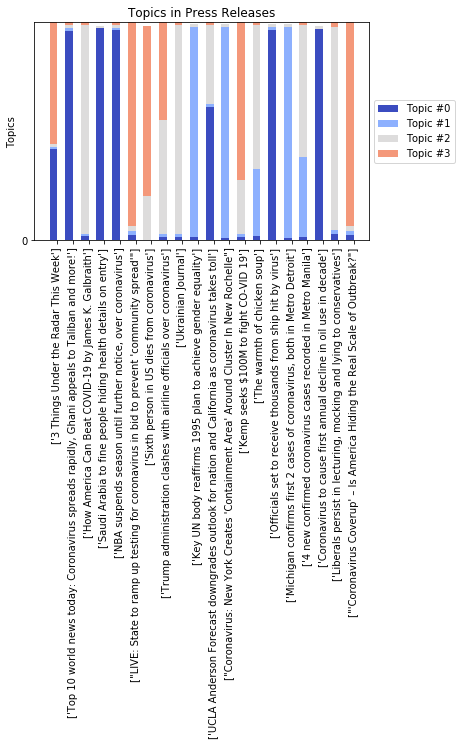

In [595]:
N = 20
ind = np.arange(N)
K = CA_context_lda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, CA_context_ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, CA_context_ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += CA_context_ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, CA_context_ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 20))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

/Users/motoku/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]


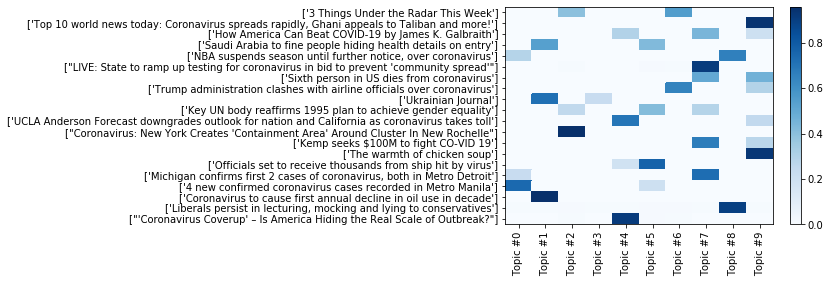

In [488]:
plt.pcolor(CA_context_ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(CA_context_ldaDFVis.shape[0])+0.5, CA_context_ldaDFVisNames);
plt.xticks(np.arange(CA_context_ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [490]:
CA_context_lda.show_topic(2) #check different topics

[('coronavirus', 0.083197504),
 ('new', 0.028120752),
 ('case', 0.027845731),
 ('health', 0.022589045),
 ('say', 0.01955793),
 ('spread', 0.019020924),
 ('week', 0.014444691),
 ('public', 0.013652477),
 ('country', 0.01336362),
 ('people', 0.013078097)]

In [491]:
topicsDict = {}
for topicNum in range(CA_context_lda.num_topics):
    topicWords = [w for w, p in CA_context_lda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Topic_0      Topic_1      Topic_2      Topic_3      Topic_4  \
0  coronavirus  coronavirus  coronavirus  coronavirus  coronavirus   
1       health        price          new          say          say   
2       spread          say         case         hand       health   
3   university     outbreak       health     outbreak       people   
4        march          oil          say       market     outbreak   
5          say          cut       spread           ap      patient   
6       people     economic         week          new       spread   
7          new         year       public       health     official   
8         news     announce      country       spread         fear   
9        novel         plan       people        world         test   

       Topic_5      Topic_6      Topic_7      Topic_8      Topic_9  
0  coronavirus  coronavirus  coronavirus  coronavirus  coronavirus  
1         case         case        state         test        china  
2     outbreak     outbreak          new     positive       spread  
3          new        trump         test          say     outbreak  
4       people    president          say       people       health  
5       spread       spread       health    president        march  
6        italy          say     positive     outbreak        world  
7        state      disease     official        trump     epidemic  
8       health          new       travel         case       people  
9          say       donald          die        total     business

In [606]:
topicsDict = {}
for topicNum in range(CA_context_lda.num_topics):
    topicWords = [w for w, p in CA_context_lda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Topic_0      Topic_1      Topic_2      Topic_3      Topic_4  \
0  coronavirus  coronavirus  coronavirus  coronavirus  coronavirus   
1       spread     outbreak         case       people          say   
2        price          say          new     minister       health   
3     outbreak       school          say       health          new   
4          oil        close       people      country         test   
5      concern        world        novel          say         case   
6        trump          new     outbreak        italy      disease   
7    president        italy        china        march     official   
8          cut       people       spread         test      patient   
9         week         case       health     outbreak       spread   

       Topic_5      Topic_6  
0  coronavirus  coronavirus  
1       spread        state  
2         test         case  
3     outbreak          say  
4        world       health  
5       people        march  
6       market          new  
7      economy     announce  
8          say   university  
9        virus     outbreak

In [596]:
topicsDict = {}
for topicNum in range(CA_context_lda.num_topics):
    topicWords = [w for w, p in CA_context_lda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Topic_0      Topic_1      Topic_2      Topic_3
0  coronavirus  coronavirus  coronavirus  coronavirus
1     outbreak          say     outbreak          say
2       spread       health          new         test
3         week          new       health        state
4      concern         case         case         case
5       people        state          say       county
6         case       spread       spread          new
7        italy       people       people       health
8         test      country        march     official
9        price     minister       market      disease